#Import

In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data-retail
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
# %cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Mounted at /content/drive
/content/drive/MyDrive/data-retail


In [2]:
import os, warnings, random

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import joblib
from keras.models import load_model

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
# df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
# df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
# df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

#Preprocessing

In [4]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [5]:
# get unique kategori value

# group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
# group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]
pdList = [group_kategori2020, group_kategori2021]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [6]:
display(clean_kategori.T)

0                  1                            2    \
kodekategori          101.00             102.00                       103.00   
kategori      ['Baby Needs']  ['Mens Care (2)']  ['Healt & Beauty Care (3)']   

                            3                 4              5    \
kodekategori             104.00            105.00         106.00   
kategori      ['Kids Care (4)']  ['Cleaning (5)']  ['Homes (6)']   

                                         6                   7    \
kodekategori                          107.00              108.00   
kategori      ['Electronic & Tool kits (7)']  ['Automotive (8)']   

                             8              9                10   \
kodekategori              109.00         110.00           111.00   
kategori      ['Stationery (9)']  ['Toys (10)']  ['Sports (11)']   

                                   11                   12   \
kodekategori                    112.00               113.00   
kategori      ['Event Equipment (12)']  ['Convection (13)']   

                                   13                      14            15   \
kodekategori                    114.00                  115.00        201.00   
kategori      ['Shoes & Sandals (14)']  ['Bag & Luggage (15)']  ['Food (1)']   

                           16                17                 18   \
kodekategori            202.00            203.00             204.00   
kategori      ['Beverage (2)']  ['Medicine (3)']  ['Pets food (4)']   

                            19                  20              21   \
kodekategori             205.00              206.00          301.00   
kategori      ['Cigarette (5)']  ['Fresh Food (6)']  ['Others (1)']   

                                22                            23   \
kodekategori                 302.00                      10101.00   
kategori      ['alisha collection']  ['Makanan Bayi (Baby Food)']   

                                          24                     25   \
kodekategori                         10102.00               10103.00   
kategori      ['Bahan Kue (Baking Supplies)']  ['Biskuit (Biscuit)']   

                                          26                            27   \
kodekategori                         10104.00                      10105.00   
kategori      ['Roti dan Kue (Bread & Cake)']  ['Sarapan Pagi (Breakfast)']   

                                                    28   \
kodekategori                                   10106.00   
kategori      ['Penganan Permen (Candy Confectionary)']   

                                                        29   \
kodekategori                                       10107.00   
kategori      ['Penganan Coklat (Chocolate Confectionary)']   

                                        30       31   \
kodekategori                       10108.00 10109.00   
kategori      ['Makanan Mentah (Raw Food)']  ['Ice']   

                                          32                           33   \
kodekategori                         10110.00                     10111.00   
kategori      ['Makanan Masak (Cooked Food)']  ['Bumbu Dapur (Seasoning)']   

                           34         35                          36   \
kodekategori          10112.00   10113.00                    10114.00   
kategori      ['Mie (Noodle)']  ['Pasta']  ['Makanan Ringan (Snack)']   

                           37                       38                39   \
kodekategori          10115.00                 10116.00          10117.00   
kategori      ['Beras (Rice)']  ['Biji-bijian (Seeds)']  ['Gula (Sugar)']   

                             40                               41   \
kodekategori            10118.00                         10119.00   
kategori      ['Tepung (Flour)']  ['Minyak Goreng (Cooking Oil)']   

                                           42                            43   \
kodekategori                          10120.00                      10121.00   
kategori      ['Makanan Kaleng (Canned Food)']  ['Makan

In [7]:
# initiate the kategori list that will removed from dataset
kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [8]:
kategori_name_df = pd.DataFrame(kategori_remove_name)
# kategori_name_df.to_csv('kategori_delist.csv', index=False)

In [9]:
# drop unnecessary column
# df2017 = df2017.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
# df2018 = df2018.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
# df2019 = df2019.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [10]:
# concat 5 dataframe to single df
# df = pd.concat([df2017, df2018, df2019, df2020, df2021]).reset_index(drop=True)
df = pd.concat([df2020, df2021]).reset_index(drop=True)

In [11]:
# remove strange value in each rows from barcode column
df['barcode'] = df['barcode'].str.split(' ').str[0]

In [12]:
df.head(10)

tgl                         namabarang satuan  qty  \
0 2020-04-03 19:27:36.123        MASAKO PENYEDAP RS.SAPI/PAK    PAK 1.00   
1 2020-10-21 16:47:57.980              RINSO 770GR ANTINODA     PCS 1.00   
2 2020-04-06 17:46:52.900     CAREFREE HLT.FRESH SPR DRY 40S    PCS 1.00   
3 2020-07-31 19:15:58.547       ELLLIPS VIT HR NUTRI CLR BLS    PCS 2.00   
4 2020-05-22 13:14:43.407  KUSUKA KRIPIK RUMPUT LAUT 60GR*30    PCS 1.00   
5 2020-09-03 20:51:42.103                HIT MAT 20S (18+3S)    PCS 1.00   
6 2020-03-14 20:47:06.390   SARI ROTI SANDWICH MARGARIN GULA    PCS 1.00   
7 2020-09-21 17:08:36.647  BIORE BF COMFORT MILD SCRUB 100ML    PCS 1.00   
8 2020-02-02 20:47:39.680  SUNLIGHT EXTRA PURE REFF 24*175ML    PCS 1.00   
9 2020-01-02 10:53:20.687     IZZI F MIST SECRET CRUSH 100ML    PCS 1.00   

         barcode kodejenis                       jenis  kodekategori  \
0  8992770033208  01011108                 Bumbu Tabur         10111   
1  8999999401238  03040101             Detergent Bubuk         30401   
2  8850007331803  03031001                 Panty Liner         30310   
3  8993417200038  03030105              Vitamin Rambut         30301   
4   653314504513  01011401                Snack Modern         10114   
5  8992745120636  03040504  Pembasmi Serangga Elektrik         30405   
6  8992907953171  01010406                    Sandwich         10104   
7  8992727006514  03030605   Sabun Mandi Cair Aromatic         30306   
8  8999999549510  03040201                  Sabun Cair         30402   
9  8992856899087  03031206                     Cologne         30312   

                                            kategori  
0                            Bumbu Dapur (Seasoning)  
1                   Perawatan Pakaian (Clothes Care)  
2                 Pembalut Wanita (Sanitary Napkins)  
3                       Perawatan Rambut (Hair Care)  
4                             Makanan Ringan (Snack)  
5  Pembasmi Serangga & Pengendali Hama (Insectici...  
6                        Roti dan Kue (Bread & Cake)  
7                        Perawatan Tubuh (Body Care)  
8                     Perawatan Dapur (Kitchen Care)  
9                      Perawatan Pria (Mens Groming)

In [13]:
# create new column named "month_year" to get number of month and year
df['month_year'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [14]:
# transform the value to number of month from all rows
# 2020-2021
df['month_year'] = df['month_year'].map({'01-20':0,'02-20':1,'03-20':2,'04-20':3,'05-20':4,'06-20':5,'07-20':6,'08-20':7,'09-20':8,'10-20':9,'11-20':10,'12-20':11,
                                          '01-21':12,'02-21':13,'03-21':14,'04-21':15,'05-21':16,'06-21':17,'07-21':18,'08-21':19,'09-21':20,'10-21':21,'11-21':22,'12-21':23,})

In [15]:
# drop unnecessary kategori #tidak diremove
# df = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

In [16]:
display(df.info())
display(df.head())
# RangeIndex: 11533836 entries, 0 to 11533835 sebelum nambah daftar kategori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784003 entries, 0 to 3784002
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   namabarang    object        
 2   satuan        object        
 3   qty           float64       
 4   barcode       object        
 5   kodejenis     object        
 6   jenis         object        
 7   kodekategori  int64         
 8   kategori      object        
 9   month_year    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 288.7+ MB


None

tgl                         namabarang satuan  qty  \
0 2020-04-03 19:27:36.123        MASAKO PENYEDAP RS.SAPI/PAK    PAK 1.00   
1 2020-10-21 16:47:57.980              RINSO 770GR ANTINODA     PCS 1.00   
2 2020-04-06 17:46:52.900     CAREFREE HLT.FRESH SPR DRY 40S    PCS 1.00   
3 2020-07-31 19:15:58.547       ELLLIPS VIT HR NUTRI CLR BLS    PCS 2.00   
4 2020-05-22 13:14:43.407  KUSUKA KRIPIK RUMPUT LAUT 60GR*30    PCS 1.00   

         barcode kodejenis            jenis  kodekategori  \
0  8992770033208  01011108      Bumbu Tabur         10111   
1  8999999401238  03040101  Detergent Bubuk         30401   
2  8850007331803  03031001      Panty Liner         30310   
3  8993417200038  03030105   Vitamin Rambut         30301   
4   653314504513  01011401     Snack Modern         10114   

                             kategori  month_year  
0             Bumbu Dapur (Seasoning)           3  
1    Perawatan Pakaian (Clothes Care)           9  
2  Pembalut Wanita (Sanitary Napkins)           3  
3        Perawatan Rambut (Hair Care)           6  
4              Makanan Ringan (Snack)           4

In [17]:
# df_outlier = df.query('qty > 0 & qty <= 50')
# sns.set(rc={'figure.figsize':(20,6)})
# sns.boxplot(x='month_year', y='qty', data=df_outlier)

In [18]:
# df['satuan'].unique()

In [19]:
# df_kg = df[df['satuan'] == "KG"]
# df_kg.info()

In [20]:
# ax = sns.boxplot(x='kategori', y='qty', data=df)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [21]:
train_monthly = df[['tgl', 'month_year', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_year', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_year', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt > 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_year').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month_year kodejenis       barcode  qty_cnt  qty_cnt_month
0           0  01010101  089686640007    30.00          24.00
1           0  01010101  089686640014    30.00          34.00
2           0  01010101  089686640045    12.00          12.00
3           0  01010101  089686646047     7.00           3.00
4           0  01010101  089686646061     5.00           6.00

In [22]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_year   barcode kodejenis     0     1     2     3     4     5     6  \
0           00100809  01011601 12.75 10.78 27.13 32.93 18.57 11.34 13.62   
1           00113731  02020101  3.62  2.89  3.61  0.76  0.00  0.00  0.00   
2           00129213  02010113  0.00  0.00  5.13  0.60  2.79  8.18  0.00   
3           00133173  02010137  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
4           00133210  02010113  0.00  0.00  1.00  2.00  1.00  3.00  1.00   

month_year     7    8    9   10   11    12   13   14   15   16   17   18  \
0          12.14 8.19 4.22 2.76 3.97  7.23 3.75 5.23 5.37 4.12 2.11 2.75   
1           0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.95   
2           0.00 0.00 4.83 7.70 1.50 38.39 0.00 1.95 0.40 0.00 0.00 0.00   
3           0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4           0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 1.00 0.00 0.00 0.00   

month_year    19   20   21   22   23  
0           5.56 4.12 3.13 1.68 3.59  
1           0.75 0.78 0.45 1.72 0.32  
2           0.00 0.00 0.00 0.00 0.00  
3          47.26 0.00 0.00 0.00 0.00  
4           0.00 0.00 0.00 0.00 0.00

In [23]:
monthly_series_drop = monthly_series.drop(['kodejenis'], axis=1)

In [24]:
summed_data = monthly_series_drop.groupby('barcode').agg('sum').reset_index(False)
summed_data.head()

month_year   barcode     0     1     2     3     4     5     6     7    8  \
0           00100809 12.75 10.78 27.13 32.93 18.57 11.34 13.62 12.14 8.19   
1           00113731  3.62  2.89  3.61  0.76  0.00  0.00  0.00  0.00 0.00   
2           00129213  0.00  0.00  5.13  0.60  2.79  8.18  0.00  0.00 0.00   
3           00133173  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00   
4           00133210  0.00  0.00  1.00  2.00  1.00  3.00  1.00  0.00 0.00   

month_year    9   10   11    12   13   14   15   16   17   18    19   20   21  \
0          4.22 2.76 3.97  7.23 3.75 5.23 5.37 4.12 2.11 2.75  5.56 4.12 3.13   
1          0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.95  0.75 0.78 0.45   
2          4.83 7.70 1.50 38.39 0.00 1.95 0.40 0.00 0.00 0.00  0.00 0.00 0.00   
3          0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 47.26 0.00 0.00   
4          0.00 0.00 0.00  0.00 0.00 0.00 1.00 0.00 0.00 0.00  0.00 0.00 0.00   

month_year   22   23  
0          1.68 3.59  
1          1.72 0.32  
2          0.00 0.00  
3          0.00 0.00  
4          0.00 0.00

In [ ]:
12+12 #kurang 1 karena bulan terakhir 59

24

# bs64_fm20

In [25]:
first_month = 0
last_month = 23
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set (217252, 12)
Validation set (24140, 12)
Train set reshaped (217252, 12, 1)
Validation set reshaped (24140, 12, 1)


In [58]:
def auto_model(batch, neuron, month, first_year, end_year):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}_year{first_year}-{end_year}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()
  return gru_model

Epoch 1/1000
3395/3395 - 47s - loss: 44.3082 - accuracy: 0.3600 - val_loss: 32.3497 - val_accuracy: 0.3648 - 47s/epoch - 14ms/step
Epoch 2/1000
3395/3395 - 36s - loss: 31.0654 - accuracy: 0.3804 - val_loss: 30.3681 - val_accuracy: 0.4005 - 36s/epoch - 11ms/step
Epoch 3/1000
3395/3395 - 33s - loss: 30.1718 - accuracy: 0.3717 - val_loss: 30.1046 - val_accuracy: 0.3999 - 33s/epoch - 10ms/step
Epoch 4/1000
3395/3395 - 32s - loss: 29.9657 - accuracy: 0.3639 - val_loss: 30.0186 - val_accuracy: 0.3885 - 32s/epoch - 9ms/step
Epoch 5/1000
3395/3395 - 31s - loss: 29.8531 - accuracy: 0.3542 - val_loss: 29.8627 - val_accuracy: 0.3850 - 31s/epoch - 9ms/step
Epoch 6/1000
3395/3395 - 31s - loss: 29.7605 - accuracy: 0.3489 - val_loss: 29.8158 - val_accuracy: 0.2452 - 31s/epoch - 9ms/step
Epoch 7/1000
3395/3395 - 31s - loss: 29.7095 - accuracy: 0.3369 - val_loss: 29.7361 - val_accuracy: 0.2446 - 31s/epoch - 9ms/step
Epoch 8/1000
3395/3395 - 31s - loss: 29.6752 - accuracy: 0.3339 - val_loss: 29.7209 - v

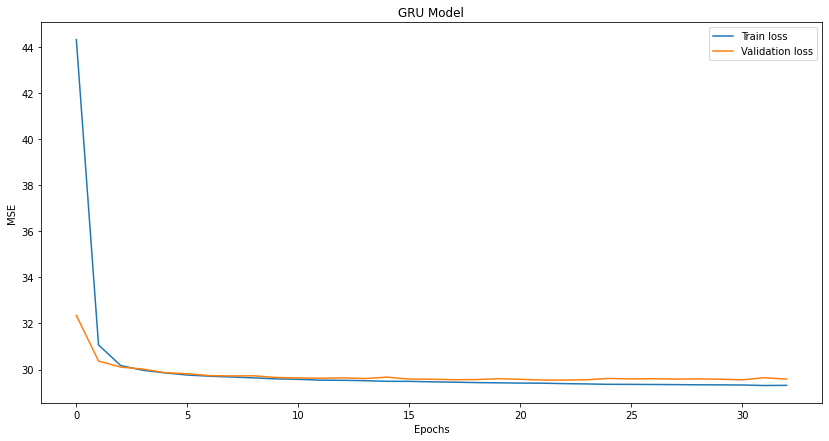

In [59]:
model1 = auto_model(64, 64, 0, 2020, 2021)

Epoch 1/1000
3395/3395 - 28s - loss: 49.5550 - accuracy: 0.3242 - val_loss: 36.8034 - val_accuracy: 0.3846 - 28s/epoch - 8ms/step
Epoch 2/1000
3395/3395 - 26s - loss: 34.1386 - accuracy: 0.3804 - val_loss: 31.8577 - val_accuracy: 0.3828 - 26s/epoch - 8ms/step
Epoch 3/1000
3395/3395 - 25s - loss: 31.2062 - accuracy: 0.3806 - val_loss: 30.6555 - val_accuracy: 0.3774 - 25s/epoch - 8ms/step
Epoch 4/1000
3395/3395 - 26s - loss: 30.3865 - accuracy: 0.3832 - val_loss: 30.2682 - val_accuracy: 0.3870 - 26s/epoch - 8ms/step
Epoch 5/1000
3395/3395 - 26s - loss: 30.0953 - accuracy: 0.3547 - val_loss: 30.1193 - val_accuracy: 0.2387 - 26s/epoch - 8ms/step
Epoch 6/1000
3395/3395 - 25s - loss: 29.9610 - accuracy: 0.3173 - val_loss: 30.0100 - val_accuracy: 0.3854 - 25s/epoch - 7ms/step
Epoch 7/1000
3395/3395 - 26s - loss: 29.8812 - accuracy: 0.3244 - val_loss: 30.0433 - val_accuracy: 0.2423 - 26s/epoch - 8ms/step
Epoch 8/1000
3395/3395 - 27s - loss: 29.8347 - accuracy: 0.3212 - val_loss: 29.9193 - val_

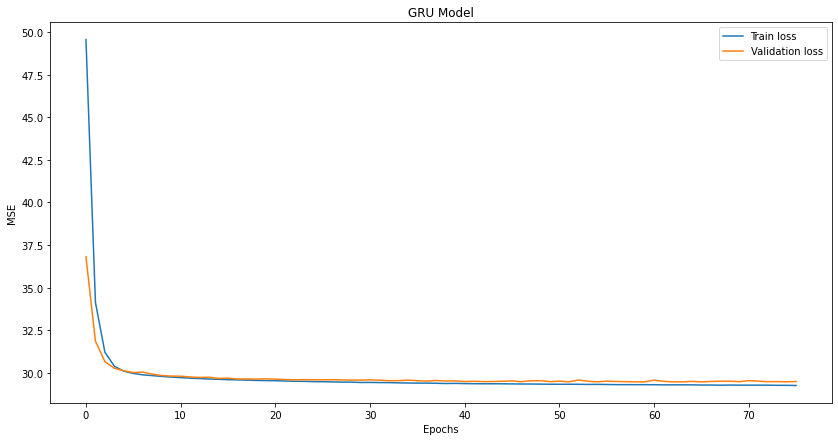

In [60]:
model2 = auto_model(64, 32, 0, 2020, 2021)

Epoch 1/1000
3395/3395 - 27s - loss: 72.7068 - accuracy: 0.2054 - val_loss: 51.7182 - val_accuracy: 0.3740 - 27s/epoch - 8ms/step
Epoch 2/1000
3395/3395 - 24s - loss: 45.6413 - accuracy: 0.3789 - val_loss: 39.9400 - val_accuracy: 0.3890 - 24s/epoch - 7ms/step
Epoch 3/1000
3395/3395 - 24s - loss: 37.5798 - accuracy: 0.3879 - val_loss: 34.8276 - val_accuracy: 0.3826 - 24s/epoch - 7ms/step
Epoch 4/1000
3395/3395 - 24s - loss: 33.7305 - accuracy: 0.3937 - val_loss: 32.4043 - val_accuracy: 0.3921 - 24s/epoch - 7ms/step
Epoch 5/1000
3395/3395 - 24s - loss: 31.8990 - accuracy: 0.3972 - val_loss: 31.2901 - val_accuracy: 0.4019 - 24s/epoch - 7ms/step
Epoch 6/1000
3395/3395 - 25s - loss: 30.9995 - accuracy: 0.3759 - val_loss: 30.7016 - val_accuracy: 0.4075 - 25s/epoch - 7ms/step
Epoch 7/1000
3395/3395 - 24s - loss: 30.5439 - accuracy: 0.3469 - val_loss: 30.4767 - val_accuracy: 0.2001 - 24s/epoch - 7ms/step
Epoch 8/1000
3395/3395 - 24s - loss: 30.3023 - accuracy: 0.3162 - val_loss: 30.2905 - val_

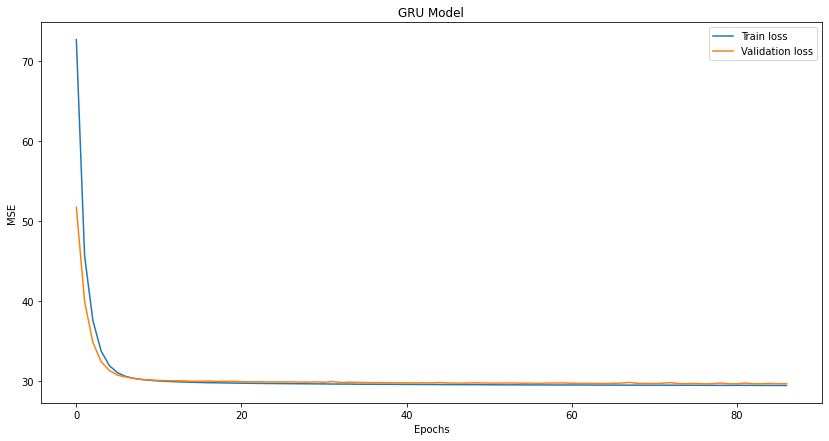

In [61]:
model3 = auto_model(64, 16, 0, 2020, 2021)

Epoch 1/1000
3395/3395 - 26s - loss: 83.9476 - accuracy: 0.2048 - val_loss: 70.2672 - val_accuracy: 0.0906 - 26s/epoch - 8ms/step
Epoch 2/1000
3395/3395 - 24s - loss: 62.7143 - accuracy: 0.2947 - val_loss: 55.6078 - val_accuracy: 0.3770 - 24s/epoch - 7ms/step
Epoch 3/1000
3395/3395 - 23s - loss: 52.2720 - accuracy: 0.3721 - val_loss: 47.5558 - val_accuracy: 0.3734 - 23s/epoch - 7ms/step
Epoch 4/1000
3395/3395 - 23s - loss: 45.3716 - accuracy: 0.3768 - val_loss: 41.9046 - val_accuracy: 0.3807 - 23s/epoch - 7ms/step
Epoch 5/1000
3395/3395 - 23s - loss: 40.4771 - accuracy: 0.3847 - val_loss: 37.9707 - val_accuracy: 0.3829 - 23s/epoch - 7ms/step
Epoch 6/1000
3395/3395 - 23s - loss: 37.0890 - accuracy: 0.3892 - val_loss: 35.3112 - val_accuracy: 0.3945 - 23s/epoch - 7ms/step
Epoch 7/1000
3395/3395 - 24s - loss: 34.8106 - accuracy: 0.3914 - val_loss: 33.5859 - val_accuracy: 0.3906 - 24s/epoch - 7ms/step
Epoch 8/1000
3395/3395 - 24s - loss: 33.3346 - accuracy: 0.3900 - val_loss: 32.4879 - val_

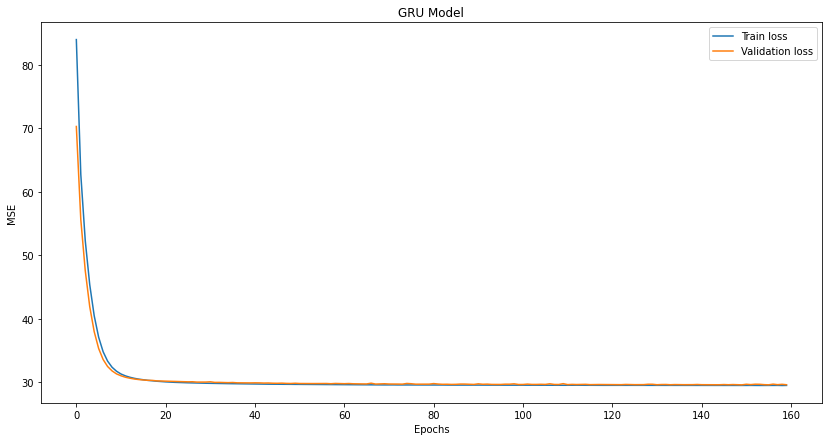

In [62]:
model4 = auto_model(64, 8, 0, 2020, 2021)

# Test - web fix

In [63]:
# data preprocessing for prediction january 2022

testing = df2021.copy()

testing['month_year'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_year'] = testing['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11})
# testing['month_year'] = testing['month_year'].map({'01-21':'Januari','02-21':'Februari','03-21':'Maret','04-21':'April','05-21':'Mei','06-21':'Juni','07-21':'Juli','08-21':'Agustus','09-21':'September','10-21':"Oktober",'11-21':'November','12-21':'Desember'})

test_monthly = testing[['tgl', 'month_year', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_year', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [64]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head())

month_year   barcode     0    1    2    3    4    5    6     7    8    9   10  \
0           00100809  7.23 3.75 5.23 5.37 4.12 2.11 2.75  5.56 4.12 3.13 1.68   
1           00113731  0.00 0.00 0.00 0.00 0.00 0.00 0.95  0.75 0.78 0.45 1.72   
2           00129213 38.39 0.00 1.95 0.40 0.00 0.00 0.00  0.00 0.00 0.00 0.00   
3           00133173  0.00 0.00 0.00 0.00 0.00 0.00 0.00 47.26 0.00 0.00 0.00   
4           00133210  0.00 0.00 0.00 1.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00   

month_year   11  
0          3.59  
1          0.32  
2          0.00  
3          0.00  
4          0.00

In [65]:
# data preprocessing for prediction february 2022

testing_pred = df2022.copy()

testing_pred = testing_pred.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

testing_pred['month_year'] = testing_pred['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing_pred['month_year'] = testing_pred['month_year'].map({'01-22':0,'02-22':1})

testing_monthly_pred = testing_pred[['tgl', 'month_year', 'barcode', 'qty']]
testing_monthly_pred = testing_monthly_pred.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
testing_monthly_pred = testing_monthly_pred.agg({'qty':['sum']})
testing_monthly_pred.columns = ['month_year', 'barcode', 'qty_cnt']
testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
testing_monthly_pred['qty_cnt_month'] = testing_monthly_pred.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

testing_monthly_series_pred = testing_monthly_pred.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [66]:
print(f"Min date from data set: {testing_pred['tgl'].min().date()}")
print(f"Max date from data set: {testing_pred['tgl'].max().date()}")
print("Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1")

Min date from data set: 2022-01-01
Max date from data set: 2022-03-01
Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1


In [67]:
testing_monthly_series_pred.head()

month_year   barcode   0.0   1.0
0           00100809  5.67  2.89
1           00113731  0.87  0.00
2           00133241 20.52 36.09
3           00149457  6.05  7.65
4           00149815  8.21 12.49

In [68]:
pred_list = ['96770', '011747234207', '96842', '97162', '8992933211115', '8999999195670', '00100809', '9557062331128', '97515', '00149457']
df_pred_list = df[df['barcode'].isin(pred_list)].reset_index(drop=True)

In [69]:
df_pred_grouped = df_pred_list.groupby(["barcode", "namabarang"]).size().reset_index().rename(columns={0:'count'})
product_list = df_pred_grouped['barcode'].to_list()
namabarang = df_pred_grouped['namabarang'].to_list()

In [70]:
# get data selected product list from 2021 and 2022 for ploting on website

# product_list = ['011747233057', '011747234207', '055500130221']
# namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

selected_data_2021 = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2021['namabarang'] = namabarang
selected_data_2022['namabarang'] = namabarang
selected_data_2021 = selected_data_2021[['barcode', 'namabarang', 0, 1, 2, 3,  4, 5, 6, 7, 8, 9, 10, 11]]
selected_data_2022 = selected_data_2022[['barcode', 'namabarang', 0, 1]]
selected_data_2021.rename(columns = {0:'Januari', 1:'Februari', 2:'Maret', 3:'April', 4:'Mei', 5:'Juni', 6:'Juli', 7:'Agustus', 8:'September', 9:'Oktober', 10:'November', 11:'Desember'}, inplace = True)
selected_data_2022.rename(columns = {0:'Januari', 1:'Februari'}, inplace = True)
# selected_data_2022.drop(['barcode', 'kodejenis'], axis=1, inplace=True)
# appenned_data = df.append()
# # df_train_raw.to_csv('df_train_raw_new.csv', index=False)
display(selected_data_2021)
display(selected_data_2022)
# display(appenned_data)

month_year        barcode                     namabarang  Januari  Februari  \
0                00100809              KACANG HIJAU / KG     7.23      3.75   
1                00149457                 MELON PUTIH/KG    14.10      1.38   
2            011747234207         DOLPIN GARAM 1000GR*12    17.00      9.00   
3           8992933211115        NUTRIJELL STRAWBERRY 12    16.00     12.00   
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    26.00     18.00   
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    23.00      9.00   
6                   96770                   GELAS CJ-255     9.00      9.00   
7                   96842              SISIR GARPU HITAM     0.00      0.00   
8                   97162              GELAS POLOS HS-9N     6.00     16.00   
9                   97515      MASKING TAPE 2" TBL BERRY     3.00      6.00   

month_year  Maret  April   Mei  Juni  Juli  Agustus  September  Oktober  \
0            5.23   5.37  4.12  2.11  2.75     5.56       4.12     3.13   
1           12.59  11.06  8.71  4.14  8.12     1.13       8.30    13.51   
2           12.00  14.00 12.00 19.00 14.00    15.00      14.00    16.00   
3           23.00  33.00 16.00  9.00 15.00    10.00      12.00    11.00   
4           38.00  21.00 17.00 18.00 21.00    14.00      23.00    18.00   
5           12.00  14.00 20.00 18.00 11.00    12.00      18.00    12.00   
6           16.00   0.00 11.00 13.00  0.00     0.00       5.00     6.00   
7            0.00   4.00  3.00  1.00  2.00     1.00       1.00     0.00   
8           13.00   8.00 16.00 23.00  1.00     0.00       0.00    12.00   
9            0.00   6.00  7.00  1.00  6.00     3.00       0.00     3.00   

month_year  November  Desember  
0               1.68      3.59  
1               9.53      9.14  
2              20.00     24.00  
3               8.00     12.00  
4              17.00     28.00  
5              14.00     26.00  
6               1.00      4.00  
7               0.00      0.00  
8               0.00      8.00  
9               3.00      6.00

month_year        barcode                     namabarang  Januari  Februari
0                00100809              KACANG HIJAU / KG     5.67      2.89
1                00149457                 MELON PUTIH/KG     6.05      7.65
2            011747234207         DOLPIN GARAM 1000GR*12    12.00      8.00
3           8992933211115        NUTRIJELL STRAWBERRY 12     9.00      8.00
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    37.00     38.00
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    17.00     10.00
6                   96770                   GELAS CJ-255     8.00      0.00
7                   96842              SISIR GARPU HITAM     5.00      4.00
8                   97162              GELAS POLOS HS-9N    16.00      4.00
9                   97515      MASKING TAPE 2" TBL BERRY     8.00      4.00

In [71]:
# selected_data_2021.to_csv('riwayat_pred_jan.csv', index=False)
# selected_data_2021.drop(['Januari'], axis=1, inplace=True)
# selected_data_2021['Januari'] = selected_data_2022['Januari']
# selected_data_2021.to_csv('riwayat_pred_feb.csv', index=False)

In [72]:
selected_data_2021

month_year        barcode                     namabarang  Januari  Februari  \
0                00100809              KACANG HIJAU / KG     7.23      3.75   
1                00149457                 MELON PUTIH/KG    14.10      1.38   
2            011747234207         DOLPIN GARAM 1000GR*12    17.00      9.00   
3           8992933211115        NUTRIJELL STRAWBERRY 12    16.00     12.00   
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    26.00     18.00   
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    23.00      9.00   
6                   96770                   GELAS CJ-255     9.00      9.00   
7                   96842              SISIR GARPU HITAM     0.00      0.00   
8                   97162              GELAS POLOS HS-9N     6.00     16.00   
9                   97515      MASKING TAPE 2" TBL BERRY     3.00      6.00   

month_year  Maret  April   Mei  Juni  Juli  Agustus  September  Oktober  \
0            5.23   5.37  4.12  2.11  2.75     5.56       4.12     3.13   
1           12.59  11.06  8.71  4.14  8.12     1.13       8.30    13.51   
2           12.00  14.00 12.00 19.00 14.00    15.00      14.00    16.00   
3           23.00  33.00 16.00  9.00 15.00    10.00      12.00    11.00   
4           38.00  21.00 17.00 18.00 21.00    14.00      23.00    18.00   
5           12.00  14.00 20.00 18.00 11.00    12.00      18.00    12.00   
6           16.00   0.00 11.00 13.00  0.00     0.00       5.00     6.00   
7            0.00   4.00  3.00  1.00  2.00     1.00       1.00     0.00   
8           13.00   8.00 16.00 23.00  1.00     0.00       0.00    12.00   
9            0.00   6.00  7.00  1.00  6.00     3.00       0.00     3.00   

month_year  November  Desember  
0               1.68      3.59  
1               9.53      9.14  
2              20.00     24.00  
3               8.00     12.00  
4              17.00     28.00  
5              14.00     26.00  
6               1.00      4.00  
7               0.00      0.00  
8               0.00      8.00  
9               3.00      6.00

In [73]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True) # 2021 data
# df_pred_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True) # 2022 data
# df_pred = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# df_pred.fillna(0, inplace=True)
# df_pred.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [74]:
# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_jan = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_jan.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_jan.drop([0], axis=1, inplace=True)
# df_pred_jan.head()
# df_pred_jan.to_csv('df_pred_jan.csv', index=False)

In [75]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_feb = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_feb.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_feb
# df_pred_feb[0]
# df_pred_jan[12] = df_pred_feb[0]
# df_pred_jan
# df_pred_jan.to_csv('df_pred_feb.csv', index=False)

In [76]:
# df_pred.to_csv('df_pred.csv', index=False)

In [77]:
jan = pd.read_csv('./riwayat_pred_jan.csv')
feb = pd.read_csv('./riwayat_pred_feb.csv')

In [78]:
# drop unnecessary column

X_jan = jan.drop_duplicates(subset=['barcode'])
X_jan.fillna(0, inplace=True)
X_jan.drop(['barcode', 'namabarang'], axis=1, inplace=True)

X_feb = feb.drop_duplicates(subset=['barcode'])
X_feb.fillna(0, inplace=True)
X_feb.drop(['barcode', 'namabarang'], axis=1, inplace=True)

In [79]:
display(X_jan)
display(X_feb)

Januari  Februari  Maret  April   Mei  Juni  Juli  Agustus  September  \
0     7.23      3.75   5.23   5.37  4.12  2.11  2.75     5.56       4.12   
1    14.10      1.38  12.59  11.06  8.71  4.14  8.12     1.13       8.30   
2    17.00      9.00  12.00  14.00 12.00 19.00 14.00    15.00      14.00   
3    16.00     12.00  23.00  33.00 16.00  9.00 15.00    10.00      12.00   
4    26.00     18.00  38.00  21.00 17.00 18.00 21.00    14.00      23.00   
5    23.00      9.00  12.00  14.00 20.00 18.00 11.00    12.00      18.00   
6     9.00      9.00  16.00   0.00 11.00 13.00  0.00     0.00       5.00   
7     0.00      0.00   0.00   4.00  3.00  1.00  2.00     1.00       1.00   
8     6.00     16.00  13.00   8.00 16.00 23.00  1.00     0.00       0.00   
9     3.00      6.00   0.00   6.00  7.00  1.00  6.00     3.00       0.00   

   Oktober  November  Desember  
0     3.13      1.68      3.59  
1    13.51      9.53      9.14  
2    16.00     20.00     24.00  
3    11.00      8.00     12.00  
4    18.00     17.00     28.00  
5    12.00     14.00     26.00  
6     6.00      1.00      4.00  
7     0.00      0.00      0.00  
8    12.00      0.00      8.00  
9     3.00      3.00      6.00

Februari  Maret  April   Mei  Juni  Juli  Agustus  September  Oktober  \
0      3.75   5.23   5.37  4.12  2.11  2.75     5.56       4.12     3.13   
1      1.38  12.59  11.06  8.71  4.14  8.12     1.13       8.30    13.51   
2      9.00  12.00  14.00 12.00 19.00 14.00    15.00      14.00    16.00   
3     12.00  23.00  33.00 16.00  9.00 15.00    10.00      12.00    11.00   
4     18.00  38.00  21.00 17.00 18.00 21.00    14.00      23.00    18.00   
5      9.00  12.00  14.00 20.00 18.00 11.00    12.00      18.00    12.00   
6      9.00  16.00   0.00 11.00 13.00  0.00     0.00       5.00     6.00   
7      0.00   0.00   4.00  3.00  1.00  2.00     1.00       1.00     0.00   
8     16.00  13.00   8.00 16.00 23.00  1.00     0.00       0.00    12.00   
9      6.00   0.00   6.00  7.00  1.00  6.00     3.00       0.00     3.00   

   November  Desember  Januari  
0      1.68      3.59     5.67  
1      9.53      9.14     6.05  
2     20.00     24.00    12.00  
3      8.00     12.00     9.00  
4     17.00     28.00    37.00  
5     14.00     26.00    17.00  
6      1.00      4.00     8.00  
7      0.00      0.00     5.00  
8      0.00      8.00    16.00  
9      3.00      6.00     8.00

In [80]:
# reshape the predict dataset

X_reshaped_jan = X_jan.values.reshape((X_jan.shape[0], X_jan.shape[1], 1))
display(X_reshaped_jan.shape)

X_reshaped_feb = X_feb.values.reshape((X_feb.shape[0], X_feb.shape[1], 1))
display(X_reshaped_feb.shape)

(10, 12, 1)

(10, 12, 1)

In [81]:
# gru_model = load_model('gru_model-bs32_hn16_month0.h5')
# gru_model = load_model('gru_model-bs32_hn16_month35.h5')

In [82]:
# predict the dataset

model_pred_jan = model4.predict(X_reshaped_jan)
model_pred_feb = model4.predict(X_reshaped_feb)

In [83]:
model_pred_feb

array([[ 3.5265198],
       [ 7.2675476],
       [14.720966 ],
       [ 9.974999 ],
       [23.02976  ],
       [15.758006 ],
       [ 5.356533 ],
       [ 2.3863945],
       [ 9.470783 ],
       [ 4.3513746]], dtype=float32)

In [84]:
# get back the barcode to pairing the prediction

barcode_pred_jan = jan[['barcode', 'namabarang']]
barcode_pred_feb = feb[['barcode', 'namabarang']]

prediction_jan = pd.DataFrame(barcode_pred_jan[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_jan['prediction_january'] = pd.DataFrame(model_pred_jan)
display(prediction_jan)

prediction_feb = pd.DataFrame(barcode_pred_feb[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_feb['prediction_february'] = pd.DataFrame(model_pred_feb)
display(prediction_feb)

# pred.to_csv('gru_submission.csv', index=False)

barcode                     namabarang  prediction_january
0         100809              KACANG HIJAU / KG                3.32
1         149457                 MELON PUTIH/KG                8.24
2    11747234207         DOLPIN GARAM 1000GR*12               16.69
3  8992933211115        NUTRIJELL STRAWBERRY 12               10.70
4  8999999195670    SARIWANGI TB ASLI 100*12 BR               19.44
5  9557062331128  MR.POTATO CRISPS ORG.14*160GR               15.95
6          96770                   GELAS CJ-255                4.34
7          96842              SISIR GARPU HITAM                0.74
8          97162              GELAS POLOS HS-9N                7.06
9          97515      MASKING TAPE 2" TBL BERRY                3.54

barcode                     namabarang  prediction_february
0         100809              KACANG HIJAU / KG                 3.53
1         149457                 MELON PUTIH/KG                 7.27
2    11747234207         DOLPIN GARAM 1000GR*12                14.72
3  8992933211115        NUTRIJELL STRAWBERRY 12                 9.97
4  8999999195670    SARIWANGI TB ASLI 100*12 BR                23.03
5  9557062331128  MR.POTATO CRISPS ORG.14*160GR                15.76
6          96770                   GELAS CJ-255                 5.36
7          96842              SISIR GARPU HITAM                 2.39
8          97162              GELAS POLOS HS-9N                 9.47
9          97515      MASKING TAPE 2" TBL BERRY                 4.35

In [85]:
selected_data_2022

month_year        barcode                     namabarang  Januari  Februari
0                00100809              KACANG HIJAU / KG     5.67      2.89
1                00149457                 MELON PUTIH/KG     6.05      7.65
2            011747234207         DOLPIN GARAM 1000GR*12    12.00      8.00
3           8992933211115        NUTRIJELL STRAWBERRY 12     9.00      8.00
4           8999999195670    SARIWANGI TB ASLI 100*12 BR    37.00     38.00
5           9557062331128  MR.POTATO CRISPS ORG.14*160GR    17.00     10.00
6                   96770                   GELAS CJ-255     8.00      0.00
7                   96842              SISIR GARPU HITAM     5.00      4.00
8                   97162              GELAS POLOS HS-9N    16.00      4.00
9                   97515      MASKING TAPE 2" TBL BERRY     8.00      4.00

In [86]:
pred = prediction_jan["prediction_january"]
# pred = prediction_feb["prediction_february"]

In [87]:
actual = selected_data_2022['Januari']
# actual = selected_data_2022[1]

In [88]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual, pred)

43.19818198724078

In [89]:
# lstm_train_pred = gru_model.predict(X_train)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))

print('Prediction rmse:', np.sqrt(mean_squared_error(actual, pred)))

Prediction rmse: 6.900494491794811


# bs64_fm23

In [ ]:
first_month = 23
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set (694192, 12)
Validation set (77133, 12)
Train set reshaped (694192, 12, 1)
Validation set reshaped (77133, 12, 1)


In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
10847/10847 - 81s - loss: 26.6314 - accuracy: 0.5901 - val_loss: 23.6111 - val_accuracy: 0.5924 - 81s/epoch - 7ms/step
Epoch 2/1000
10847/10847 - 80s - loss: 23.5465 - accuracy: 0.5926 - val_loss: 23.4380 - val_accuracy: 0.5967 - 80s/epoch - 7ms/step
Epoch 3/1000
10847/10847 - 79s - loss: 23.4270 - accuracy: 0.5916 - val_loss: 23.4404 - val_accuracy: 0.5943 - 79s/epoch - 7ms/step
Epoch 4/1000
10847/10847 - 78s - loss: 23.3737 - accuracy: 0.5914 - val_loss: 23.3101 - val_accuracy: 0.5915 - 78s/epoch - 7ms/step
Epoch 5/1000
10847/10847 - 79s - loss: 23.3335 - accuracy: 0.5918 - val_loss: 23.3261 - val_accuracy: 0.5908 - 79s/epoch - 7ms/step
Epoch 6/1000
10847/10847 - 76s - loss: 23.3028 - accuracy: 0.5920 - val_loss: 23.2843 - val_accuracy: 0.6029 - 76s/epoch - 7ms/step
Epoch 7/1000
10847/10847 - 78s - loss: 23.2817 - accuracy: 0.5927 - val_loss: 23.2824 - val_accuracy: 0.5899 - 78s/epoch - 7ms/step
Epoch 8/1000
10847/10847 - 78s - loss: 23.2751 - accuracy: 0.5923 - val_loss

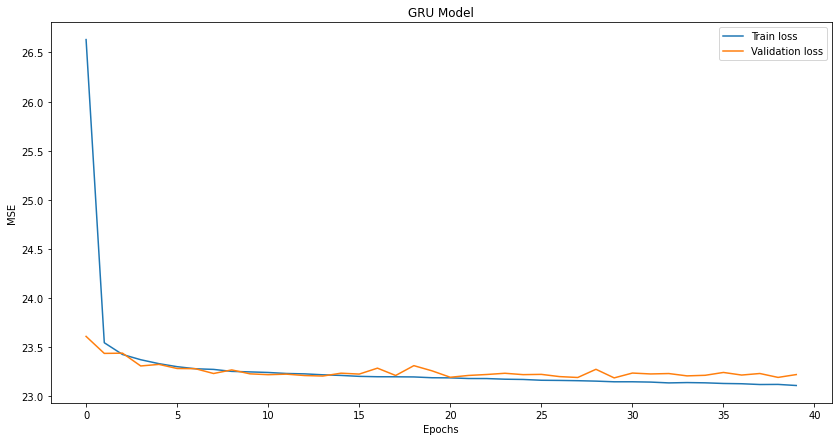

In [ ]:
auto_model(64, 64, 23)

Epoch 1/1000
10847/10847 - 67s - loss: 30.2314 - accuracy: 0.5869 - val_loss: 24.1086 - val_accuracy: 0.5978 - 67s/epoch - 6ms/step
Epoch 2/1000
10847/10847 - 66s - loss: 23.8195 - accuracy: 0.5981 - val_loss: 23.6168 - val_accuracy: 0.5950 - 66s/epoch - 6ms/step
Epoch 3/1000
10847/10847 - 67s - loss: 23.5676 - accuracy: 0.5967 - val_loss: 23.4806 - val_accuracy: 0.5935 - 67s/epoch - 6ms/step
Epoch 4/1000
10847/10847 - 68s - loss: 23.4660 - accuracy: 0.5941 - val_loss: 23.3775 - val_accuracy: 0.6001 - 68s/epoch - 6ms/step
Epoch 5/1000
10847/10847 - 67s - loss: 23.4007 - accuracy: 0.5931 - val_loss: 23.3936 - val_accuracy: 0.5983 - 67s/epoch - 6ms/step
Epoch 6/1000
10847/10847 - 66s - loss: 23.3591 - accuracy: 0.5923 - val_loss: 23.3282 - val_accuracy: 0.5978 - 66s/epoch - 6ms/step
Epoch 7/1000
10847/10847 - 66s - loss: 23.3299 - accuracy: 0.5923 - val_loss: 23.3694 - val_accuracy: 0.5878 - 66s/epoch - 6ms/step
Epoch 8/1000
10847/10847 - 66s - loss: 23.3137 - accuracy: 0.5917 - val_loss

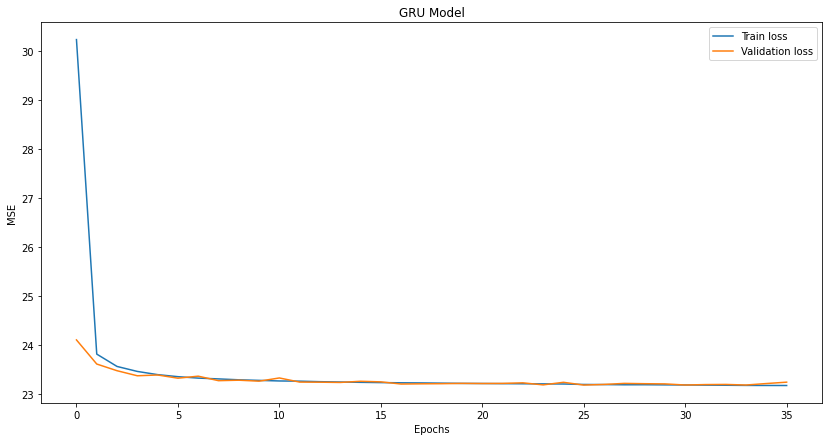

In [ ]:
auto_model(64, 32, 23)

Epoch 1/1000
10847/10847 - 65s - loss: 34.8007 - accuracy: 0.5833 - val_loss: 26.4117 - val_accuracy: 0.5969 - 65s/epoch - 6ms/step
Epoch 2/1000
10847/10847 - 62s - loss: 25.0141 - accuracy: 0.5893 - val_loss: 24.1245 - val_accuracy: 0.5923 - 62s/epoch - 6ms/step
Epoch 3/1000
10847/10847 - 62s - loss: 23.9417 - accuracy: 0.5893 - val_loss: 23.7152 - val_accuracy: 0.5851 - 62s/epoch - 6ms/step
Epoch 4/1000
10847/10847 - 63s - loss: 23.6611 - accuracy: 0.5913 - val_loss: 23.5399 - val_accuracy: 0.5876 - 63s/epoch - 6ms/step
Epoch 5/1000
10847/10847 - 63s - loss: 23.5453 - accuracy: 0.5913 - val_loss: 23.4719 - val_accuracy: 0.5935 - 63s/epoch - 6ms/step
Epoch 6/1000
10847/10847 - 62s - loss: 23.4837 - accuracy: 0.5904 - val_loss: 23.4050 - val_accuracy: 0.5904 - 62s/epoch - 6ms/step
Epoch 7/1000
10847/10847 - 62s - loss: 23.4498 - accuracy: 0.5901 - val_loss: 23.4166 - val_accuracy: 0.5870 - 62s/epoch - 6ms/step
Epoch 8/1000
10847/10847 - 61s - loss: 23.4219 - accuracy: 0.5890 - val_loss

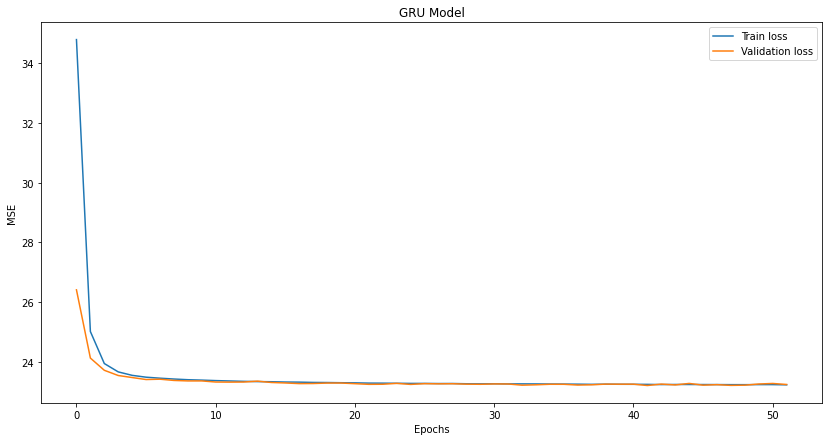

In [ ]:
auto_model(64, 16, 23)

Epoch 1/1000
10847/10847 - 61s - loss: 48.2317 - accuracy: 0.5740 - val_loss: 36.4731 - val_accuracy: 0.5940 - 61s/epoch - 6ms/step
Epoch 2/1000
10847/10847 - 59s - loss: 31.3180 - accuracy: 0.5976 - val_loss: 27.4613 - val_accuracy: 0.5980 - 59s/epoch - 5ms/step
Epoch 3/1000
10847/10847 - 58s - loss: 26.0735 - accuracy: 0.5927 - val_loss: 24.9116 - val_accuracy: 0.5919 - 58s/epoch - 5ms/step
Epoch 4/1000
10847/10847 - 59s - loss: 24.5228 - accuracy: 0.5892 - val_loss: 24.1011 - val_accuracy: 0.5956 - 59s/epoch - 5ms/step
Epoch 5/1000
10847/10847 - 58s - loss: 23.9979 - accuracy: 0.5884 - val_loss: 23.8272 - val_accuracy: 0.5927 - 58s/epoch - 5ms/step
Epoch 6/1000
10847/10847 - 59s - loss: 23.7808 - accuracy: 0.5871 - val_loss: 23.6745 - val_accuracy: 0.5876 - 59s/epoch - 5ms/step
Epoch 7/1000
10847/10847 - 59s - loss: 23.6688 - accuracy: 0.5863 - val_loss: 23.5748 - val_accuracy: 0.5844 - 59s/epoch - 5ms/step
Epoch 8/1000
10847/10847 - 59s - loss: 23.5987 - accuracy: 0.5850 - val_loss

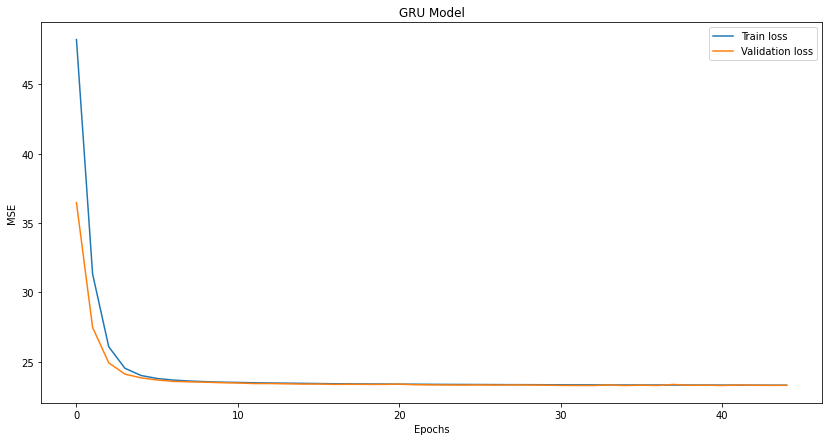

In [ ]:
auto_model(64, 8, 23)

# bs64_fm33

In [ ]:
first_month = 33
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set (416515, 12)
Validation set (46280, 12)
Train set reshaped (416515, 12, 1)
Validation set reshaped (46280, 12, 1)


In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
6509/6509 - 59s - loss: 25.0244 - accuracy: 0.6009 - val_loss: 19.6925 - val_accuracy: 0.6099 - 59s/epoch - 9ms/step
Epoch 2/1000
6509/6509 - 56s - loss: 20.4288 - accuracy: 0.6059 - val_loss: 19.3556 - val_accuracy: 0.6137 - 56s/epoch - 9ms/step
Epoch 3/1000
6509/6509 - 55s - loss: 20.2361 - accuracy: 0.6063 - val_loss: 19.2319 - val_accuracy: 0.6111 - 55s/epoch - 9ms/step
Epoch 4/1000
6509/6509 - 55s - loss: 20.1533 - accuracy: 0.6051 - val_loss: 19.1862 - val_accuracy: 0.6088 - 55s/epoch - 8ms/step
Epoch 5/1000
6509/6509 - 55s - loss: 20.1025 - accuracy: 0.6049 - val_loss: 19.1044 - val_accuracy: 0.6113 - 55s/epoch - 8ms/step
Epoch 6/1000
6509/6509 - 55s - loss: 20.0533 - accuracy: 0.6050 - val_loss: 19.1005 - val_accuracy: 0.6033 - 55s/epoch - 8ms/step
Epoch 7/1000
6509/6509 - 55s - loss: 20.0284 - accuracy: 0.6047 - val_loss: 19.0646 - val_accuracy: 0.6059 - 55s/epoch - 9ms/step
Epoch 8/1000
6509/6509 - 55s - loss: 20.0099 - accuracy: 0.6051 - val_loss: 19.0324 - val_

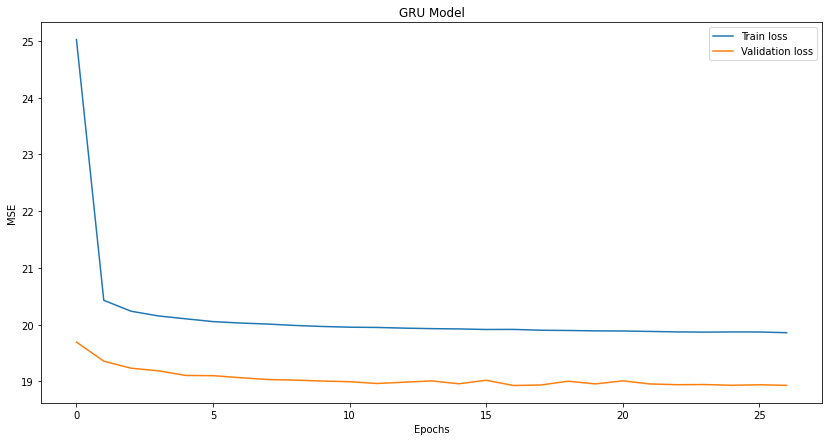

In [ ]:
auto_model(64, 64, 33)

Epoch 1/1000
6509/6509 - 50s - loss: 31.7512 - accuracy: 0.5720 - val_loss: 21.8700 - val_accuracy: 0.5945 - 50s/epoch - 8ms/step
Epoch 2/1000
6509/6509 - 47s - loss: 21.3429 - accuracy: 0.6058 - val_loss: 19.7554 - val_accuracy: 0.6106 - 47s/epoch - 7ms/step
Epoch 3/1000
6509/6509 - 48s - loss: 20.4639 - accuracy: 0.6062 - val_loss: 19.4000 - val_accuracy: 0.6077 - 48s/epoch - 7ms/step
Epoch 4/1000
6509/6509 - 48s - loss: 20.2797 - accuracy: 0.6029 - val_loss: 19.2922 - val_accuracy: 0.6011 - 48s/epoch - 7ms/step
Epoch 5/1000
6509/6509 - 47s - loss: 20.2029 - accuracy: 0.6007 - val_loss: 19.2158 - val_accuracy: 0.6005 - 47s/epoch - 7ms/step
Epoch 6/1000
6509/6509 - 47s - loss: 20.1580 - accuracy: 0.5997 - val_loss: 19.1720 - val_accuracy: 0.6070 - 47s/epoch - 7ms/step
Epoch 7/1000
6509/6509 - 47s - loss: 20.1228 - accuracy: 0.5996 - val_loss: 19.1469 - val_accuracy: 0.6032 - 47s/epoch - 7ms/step
Epoch 8/1000
6509/6509 - 47s - loss: 20.0953 - accuracy: 0.5991 - val_loss: 19.1429 - val_

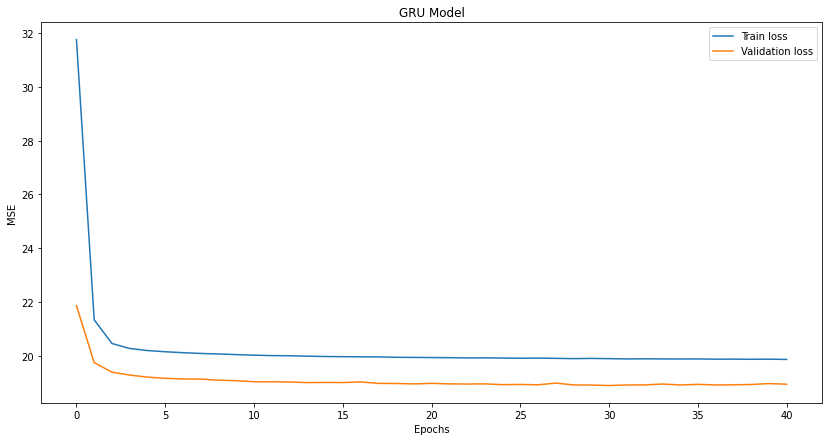

In [ ]:
auto_model(64, 32, 33)

Epoch 1/1000
5207/5207 - 37s - loss: 38.5655 - accuracy: 0.5929 - val_loss: 29.8111 - val_accuracy: 0.6052 - 37s/epoch - 7ms/step
Epoch 2/1000
5207/5207 - 34s - loss: 25.7203 - accuracy: 0.6072 - val_loss: 23.4654 - val_accuracy: 0.6118 - 34s/epoch - 7ms/step
Epoch 3/1000
5207/5207 - 35s - loss: 21.8302 - accuracy: 0.6051 - val_loss: 21.2652 - val_accuracy: 0.6063 - 35s/epoch - 7ms/step
Epoch 4/1000
5207/5207 - 37s - loss: 20.4913 - accuracy: 0.6024 - val_loss: 20.5275 - val_accuracy: 0.6045 - 37s/epoch - 7ms/step
Epoch 5/1000
5207/5207 - 35s - loss: 19.9687 - accuracy: 0.6027 - val_loss: 20.2360 - val_accuracy: 0.6097 - 35s/epoch - 7ms/step
Epoch 6/1000
5207/5207 - 35s - loss: 19.7299 - accuracy: 0.6039 - val_loss: 20.0896 - val_accuracy: 0.6068 - 35s/epoch - 7ms/step
Epoch 7/1000
5207/5207 - 35s - loss: 19.6102 - accuracy: 0.6037 - val_loss: 20.0194 - val_accuracy: 0.6067 - 35s/epoch - 7ms/step
Epoch 8/1000
5207/5207 - 34s - loss: 19.5405 - accuracy: 0.6040 - val_loss: 19.9776 - val_

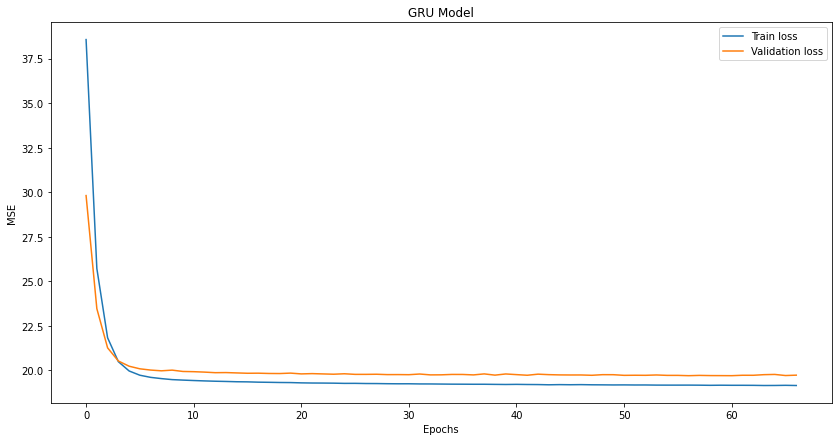

In [ ]:
auto_model(64, 16, 33)

Epoch 1/1000
5207/5207 - 36s - loss: 46.3720 - accuracy: 0.4425 - val_loss: 37.1898 - val_accuracy: 0.5977 - 36s/epoch - 7ms/step
Epoch 2/1000
5207/5207 - 35s - loss: 32.6560 - accuracy: 0.5988 - val_loss: 29.8871 - val_accuracy: 0.6071 - 35s/epoch - 7ms/step
Epoch 3/1000
5207/5207 - 38s - loss: 27.1711 - accuracy: 0.6053 - val_loss: 25.6704 - val_accuracy: 0.6083 - 38s/epoch - 7ms/step
Epoch 4/1000
5207/5207 - 39s - loss: 24.0101 - accuracy: 0.6072 - val_loss: 23.3151 - val_accuracy: 0.6100 - 39s/epoch - 8ms/step
Epoch 5/1000
5207/5207 - 39s - loss: 22.2273 - accuracy: 0.6073 - val_loss: 21.9918 - val_accuracy: 0.6087 - 39s/epoch - 7ms/step
Epoch 6/1000
5207/5207 - 37s - loss: 21.2440 - accuracy: 0.6070 - val_loss: 21.2743 - val_accuracy: 0.6089 - 37s/epoch - 7ms/step
Epoch 7/1000
5207/5207 - 35s - loss: 20.7036 - accuracy: 0.6072 - val_loss: 20.8814 - val_accuracy: 0.6108 - 35s/epoch - 7ms/step
Epoch 8/1000
5207/5207 - 34s - loss: 20.3846 - accuracy: 0.6084 - val_loss: 20.6373 - val_

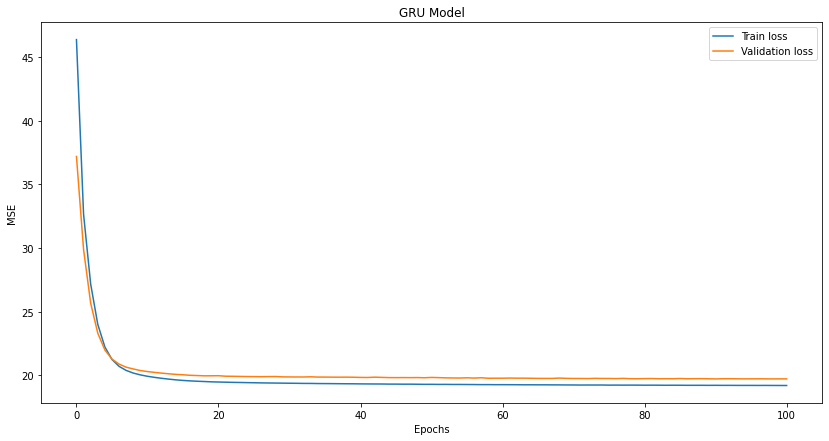

In [ ]:
auto_model(64, 8, 33)

# bs64_fm35

In [ ]:
first_month = 35
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set (360980, 12)
Validation set (40109, 12)
Train set reshaped (360980, 12, 1)
Validation set reshaped (40109, 12, 1)


In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
5641/5641 - 52s - loss: 24.7919 - accuracy: 0.6046 - val_loss: 19.6862 - val_accuracy: 0.6151 - 52s/epoch - 9ms/step
Epoch 2/1000
5641/5641 - 52s - loss: 19.9453 - accuracy: 0.6077 - val_loss: 19.3580 - val_accuracy: 0.6118 - 52s/epoch - 9ms/step
Epoch 3/1000
5641/5641 - 53s - loss: 19.7488 - accuracy: 0.6059 - val_loss: 19.4257 - val_accuracy: 0.6112 - 53s/epoch - 9ms/step
Epoch 4/1000
5641/5641 - 53s - loss: 19.6819 - accuracy: 0.6046 - val_loss: 19.2556 - val_accuracy: 0.6095 - 53s/epoch - 9ms/step
Epoch 5/1000
5641/5641 - 50s - loss: 19.6271 - accuracy: 0.6040 - val_loss: 19.2050 - val_accuracy: 0.6140 - 50s/epoch - 9ms/step
Epoch 6/1000
5641/5641 - 51s - loss: 19.5770 - accuracy: 0.6034 - val_loss: 19.1758 - val_accuracy: 0.6132 - 51s/epoch - 9ms/step
Epoch 7/1000
5641/5641 - 50s - loss: 19.5333 - accuracy: 0.6040 - val_loss: 19.2765 - val_accuracy: 0.6152 - 50s/epoch - 9ms/step
Epoch 8/1000
5641/5641 - 49s - loss: 19.5194 - accuracy: 0.6041 - val_loss: 19.1309 - val_

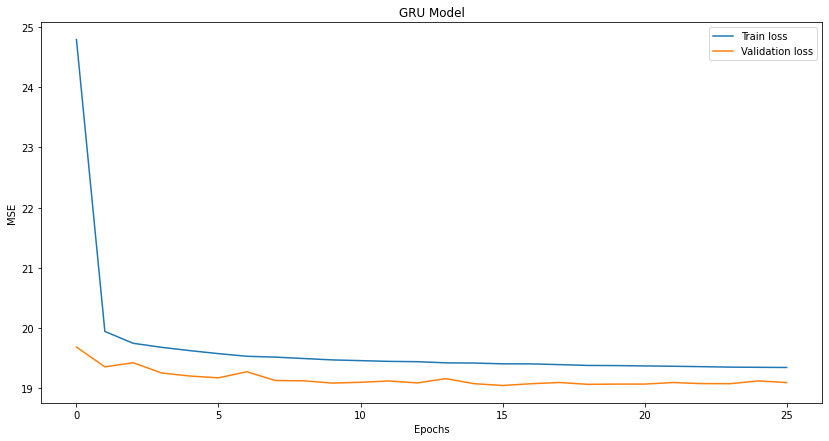

In [ ]:
auto_model(64, 64, 35)

Epoch 1/1000
5641/5641 - 58s - loss: 30.2369 - accuracy: 0.6058 - val_loss: 22.1478 - val_accuracy: 0.6193 - 58s/epoch - 10ms/step
Epoch 2/1000
5641/5641 - 50s - loss: 21.1712 - accuracy: 0.6074 - val_loss: 19.7841 - val_accuracy: 0.6147 - 50s/epoch - 9ms/step
Epoch 3/1000
5641/5641 - 49s - loss: 20.0509 - accuracy: 0.6081 - val_loss: 19.4728 - val_accuracy: 0.6129 - 49s/epoch - 9ms/step
Epoch 4/1000
5641/5641 - 48s - loss: 19.8216 - accuracy: 0.6077 - val_loss: 19.3717 - val_accuracy: 0.6093 - 48s/epoch - 9ms/step
Epoch 5/1000
5641/5641 - 48s - loss: 19.7312 - accuracy: 0.6068 - val_loss: 19.3201 - val_accuracy: 0.6125 - 48s/epoch - 8ms/step
Epoch 6/1000
5641/5641 - 47s - loss: 19.6695 - accuracy: 0.6050 - val_loss: 19.2895 - val_accuracy: 0.6133 - 47s/epoch - 8ms/step
Epoch 7/1000
5641/5641 - 47s - loss: 19.6313 - accuracy: 0.6047 - val_loss: 19.2679 - val_accuracy: 0.6041 - 47s/epoch - 8ms/step
Epoch 8/1000
5641/5641 - 47s - loss: 19.5902 - accuracy: 0.6044 - val_loss: 19.3002 - val

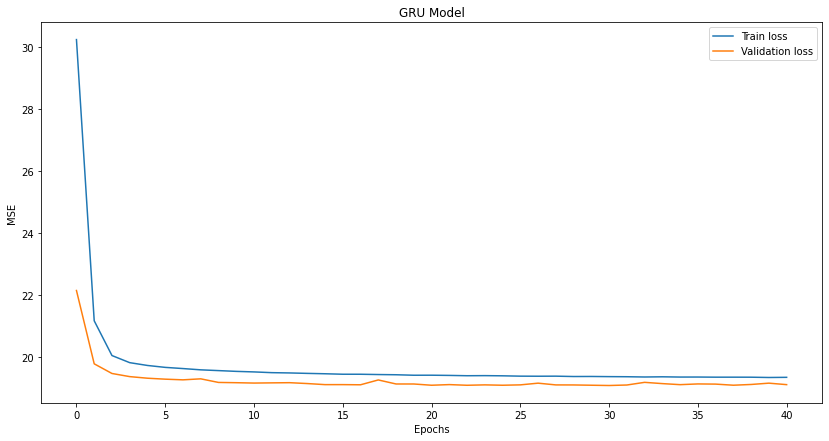

In [ ]:
auto_model(64, 32, 35)

Epoch 1/1000
5641/5641 - 50s - loss: 39.3154 - accuracy: 0.5535 - val_loss: 28.1379 - val_accuracy: 0.6090 - 50s/epoch - 9ms/step
Epoch 2/1000
5641/5641 - 44s - loss: 25.6095 - accuracy: 0.6083 - val_loss: 22.2900 - val_accuracy: 0.6132 - 44s/epoch - 8ms/step
Epoch 3/1000
5641/5641 - 45s - loss: 21.9070 - accuracy: 0.6095 - val_loss: 20.4830 - val_accuracy: 0.6148 - 45s/epoch - 8ms/step
Epoch 4/1000
5641/5641 - 46s - loss: 20.6980 - accuracy: 0.6091 - val_loss: 19.8892 - val_accuracy: 0.6134 - 46s/epoch - 8ms/step
Epoch 5/1000
5641/5641 - 45s - loss: 20.2411 - accuracy: 0.6094 - val_loss: 19.6241 - val_accuracy: 0.6146 - 45s/epoch - 8ms/step
Epoch 6/1000
5641/5641 - 44s - loss: 20.0229 - accuracy: 0.6069 - val_loss: 19.5005 - val_accuracy: 0.6071 - 44s/epoch - 8ms/step
Epoch 7/1000
5641/5641 - 43s - loss: 19.8968 - accuracy: 0.6043 - val_loss: 19.4214 - val_accuracy: 0.6069 - 43s/epoch - 8ms/step
Epoch 8/1000
5641/5641 - 44s - loss: 19.8106 - accuracy: 0.6031 - val_loss: 19.3658 - val_

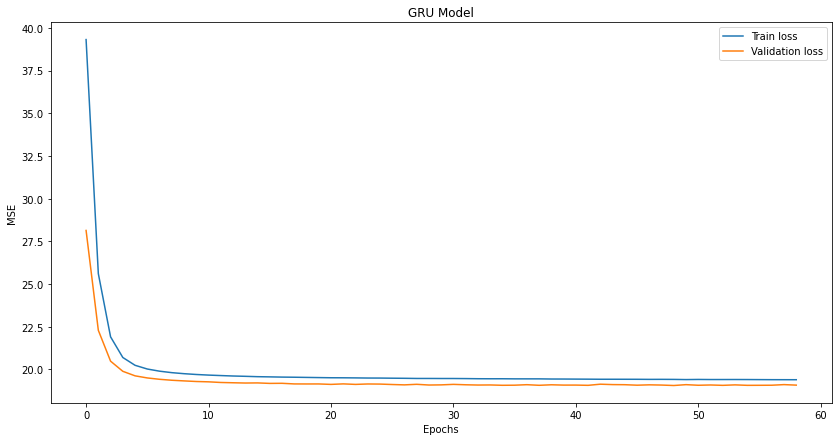

In [ ]:
auto_model(64, 16, 35)

Epoch 1/1000
5641/5641 - 42s - loss: 48.3422 - accuracy: 0.5721 - val_loss: 37.0707 - val_accuracy: 0.6053 - 42s/epoch - 7ms/step
Epoch 2/1000
5641/5641 - 38s - loss: 33.9304 - accuracy: 0.6056 - val_loss: 29.0786 - val_accuracy: 0.6112 - 38s/epoch - 7ms/step
Epoch 3/1000
5641/5641 - 37s - loss: 27.6593 - accuracy: 0.6086 - val_loss: 24.6028 - val_accuracy: 0.6101 - 37s/epoch - 7ms/step
Epoch 4/1000
5641/5641 - 38s - loss: 24.1622 - accuracy: 0.6066 - val_loss: 22.2150 - val_accuracy: 0.6099 - 38s/epoch - 7ms/step
Epoch 5/1000
5641/5641 - 37s - loss: 22.2933 - accuracy: 0.6062 - val_loss: 20.9982 - val_accuracy: 0.6104 - 37s/epoch - 7ms/step
Epoch 6/1000
5641/5641 - 39s - loss: 21.3073 - accuracy: 0.6057 - val_loss: 20.3646 - val_accuracy: 0.6120 - 39s/epoch - 7ms/step
Epoch 7/1000
5641/5641 - 38s - loss: 20.7619 - accuracy: 0.6060 - val_loss: 20.0376 - val_accuracy: 0.6065 - 38s/epoch - 7ms/step
Epoch 8/1000
5641/5641 - 37s - loss: 20.4445 - accuracy: 0.6061 - val_loss: 19.8455 - val_

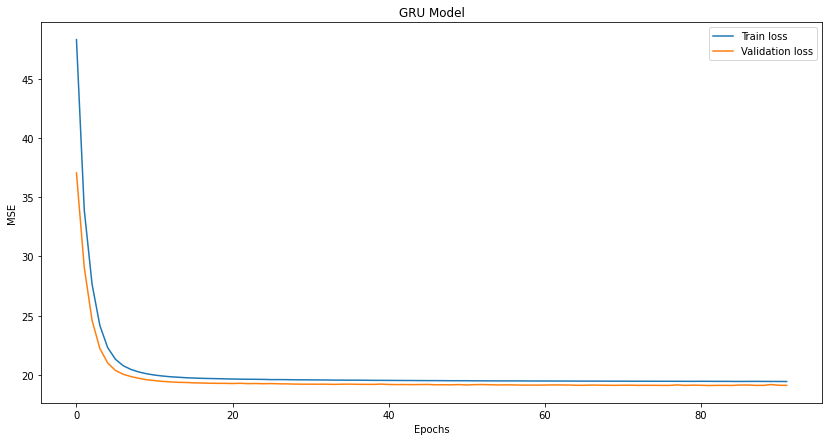

In [ ]:
auto_model(64, 8, 35)

# bs64_fm0

In [ ]:
first_month = 0
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

NameError: ignored

In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
20826/20826 - 129s - loss: 43.9527 - accuracy: 0.5037 - val_loss: 30.4473 - val_accuracy: 0.5619 - 129s/epoch - 6ms/step
Epoch 2/1000
20826/20826 - 128s - loss: 28.4052 - accuracy: 0.5605 - val_loss: 26.9973 - val_accuracy: 0.5506 - 128s/epoch - 6ms/step
Epoch 3/1000
20826/20826 - 125s - loss: 26.9185 - accuracy: 0.5589 - val_loss: 26.5106 - val_accuracy: 0.5605 - 125s/epoch - 6ms/step
Epoch 4/1000
20826/20826 - 126s - loss: 26.5982 - accuracy: 0.5604 - val_loss: 26.3388 - val_accuracy: 0.5617 - 126s/epoch - 6ms/step
Epoch 5/1000
20826/20826 - 126s - loss: 26.4388 - accuracy: 0.5595 - val_loss: 26.2344 - val_accuracy: 0.5561 - 126s/epoch - 6ms/step
Epoch 6/1000
20826/20826 - 127s - loss: 26.3640 - accuracy: 0.5578 - val_loss: 26.1938 - val_accuracy: 0.5583 - 127s/epoch - 6ms/step
Epoch 7/1000
20826/20826 - 126s - loss: 26.3218 - accuracy: 0.5561 - val_loss: 26.1739 - val_accuracy: 0.5540 - 126s/epoch - 6ms/step
Epoch 8/1000
20826/20826 - 125s - loss: 26.2877 - accuracy: 0.

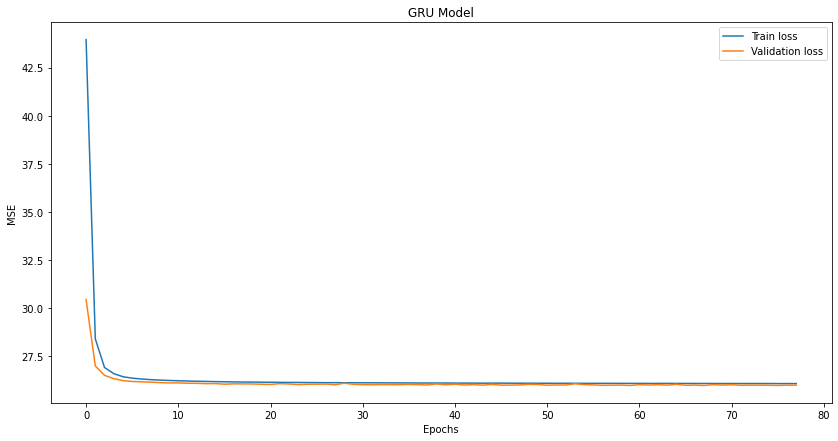

In [ ]:
auto_model(64, 8, 0)

Epoch 1/1000
10413/10413 - 115s - loss: 29.6375 - accuracy: 0.5584 - val_loss: 26.2814 - val_accuracy: 0.5610 - 115s/epoch - 11ms/step
Epoch 2/1000
10413/10413 - 111s - loss: 26.3779 - accuracy: 0.5608 - val_loss: 26.1514 - val_accuracy: 0.5552 - 111s/epoch - 11ms/step
Epoch 3/1000
10413/10413 - 111s - loss: 26.2651 - accuracy: 0.5591 - val_loss: 26.0903 - val_accuracy: 0.5568 - 111s/epoch - 11ms/step
Epoch 4/1000
10413/10413 - 112s - loss: 26.2079 - accuracy: 0.5598 - val_loss: 26.0591 - val_accuracy: 0.5552 - 112s/epoch - 11ms/step
Epoch 5/1000
10413/10413 - 110s - loss: 26.1788 - accuracy: 0.5604 - val_loss: 26.0144 - val_accuracy: 0.5605 - 110s/epoch - 11ms/step
Epoch 6/1000
10413/10413 - 111s - loss: 26.1569 - accuracy: 0.5610 - val_loss: 26.0282 - val_accuracy: 0.5527 - 111s/epoch - 11ms/step
Epoch 7/1000
10413/10413 - 111s - loss: 26.1426 - accuracy: 0.5621 - val_loss: 26.0045 - val_accuracy: 0.5610 - 111s/epoch - 11ms/step
Epoch 8/1000
10413/10413 - 111s - loss: 26.1313 - accur

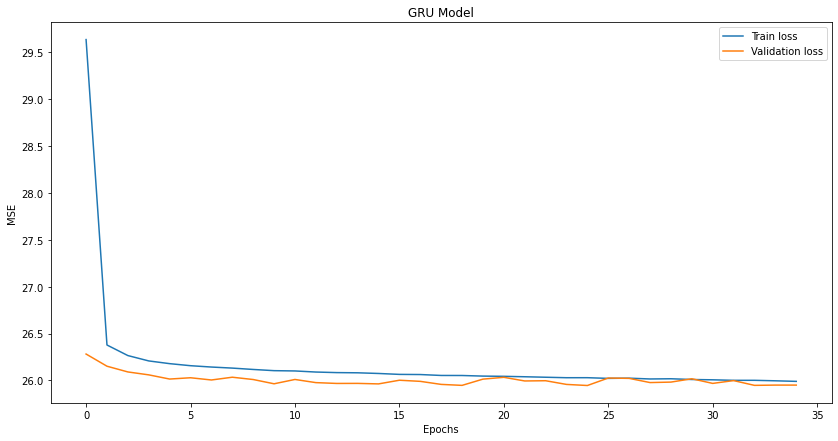

In [ ]:
 # initial first month 0
auto_model(128, 64, 0)
# auto_model(64, 16, 0)
# auto_model(64, 32, 0)
# auto_model(64, 64, 0)

Epoch 1/1000
41652/41652 - 233s - loss: 31.8383 - accuracy: 0.5482 - val_loss: 26.4313 - val_accuracy: 0.5584 - 233s/epoch - 6ms/step
Epoch 2/1000
41652/41652 - 234s - loss: 26.4591 - accuracy: 0.5610 - val_loss: 26.1799 - val_accuracy: 0.5582 - 234s/epoch - 6ms/step
Epoch 3/1000
41652/41652 - 232s - loss: 26.3275 - accuracy: 0.5576 - val_loss: 26.1657 - val_accuracy: 0.5562 - 232s/epoch - 6ms/step
Epoch 4/1000
41652/41652 - 238s - loss: 26.2647 - accuracy: 0.5559 - val_loss: 26.1442 - val_accuracy: 0.5587 - 238s/epoch - 6ms/step
Epoch 5/1000
41652/41652 - 239s - loss: 26.2292 - accuracy: 0.5559 - val_loss: 26.0883 - val_accuracy: 0.5555 - 239s/epoch - 6ms/step
Epoch 6/1000
41652/41652 - 240s - loss: 26.2084 - accuracy: 0.5556 - val_loss: 26.0674 - val_accuracy: 0.5486 - 240s/epoch - 6ms/step
Epoch 7/1000
41652/41652 - 241s - loss: 26.1901 - accuracy: 0.5557 - val_loss: 26.0620 - val_accuracy: 0.5529 - 241s/epoch - 6ms/step
Epoch 8/1000
41652/41652 - 247s - loss: 26.1780 - accuracy: 0.

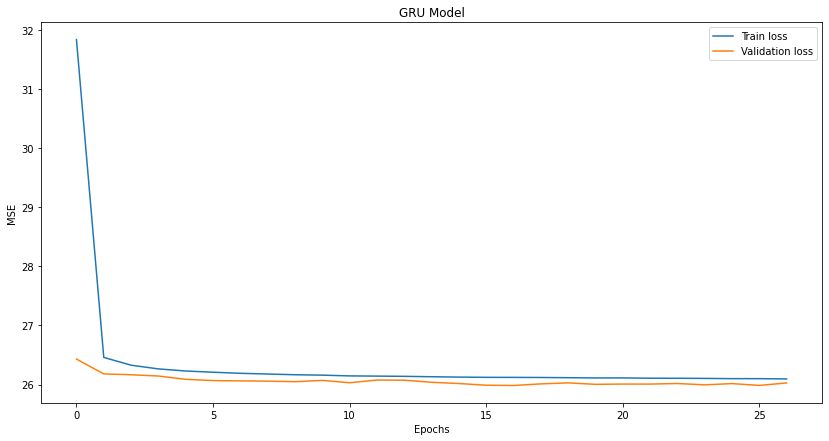

In [ ]:
# model terbaik
auto_model(32, 16, 0)

# bs64_fm47

In [ ]:
first_month = 47
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

NameError: ignored

In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
434/434 - 4s - loss: 71.3709 - accuracy: 0.6645 - val_loss: 68.4604 - val_accuracy: 0.6633 - 4s/epoch - 10ms/step
Epoch 2/1000
434/434 - 2s - loss: 67.0874 - accuracy: 0.6355 - val_loss: 63.3596 - val_accuracy: 0.5486 - 2s/epoch - 5ms/step
Epoch 3/1000
434/434 - 2s - loss: 60.9553 - accuracy: 0.1315 - val_loss: 57.6736 - val_accuracy: 0.0606 - 2s/epoch - 5ms/step
Epoch 4/1000
434/434 - 2s - loss: 56.3299 - accuracy: 0.0604 - val_loss: 53.7815 - val_accuracy: 0.0606 - 2s/epoch - 5ms/step
Epoch 5/1000
434/434 - 2s - loss: 51.9544 - accuracy: 0.0604 - val_loss: 49.0118 - val_accuracy: 0.0606 - 2s/epoch - 5ms/step
Epoch 6/1000
434/434 - 2s - loss: 47.9940 - accuracy: 0.4903 - val_loss: 46.7122 - val_accuracy: 0.5470 - 2s/epoch - 5ms/step
Epoch 7/1000
434/434 - 2s - loss: 46.2303 - accuracy: 0.5700 - val_loss: 45.3002 - val_accuracy: 0.5703 - 2s/epoch - 5ms/step
Epoch 8/1000
434/434 - 2s - loss: 44.8380 - accuracy: 0.5853 - val_loss: 44.0114 - val_accuracy: 0.5843 - 2s/epoch - 

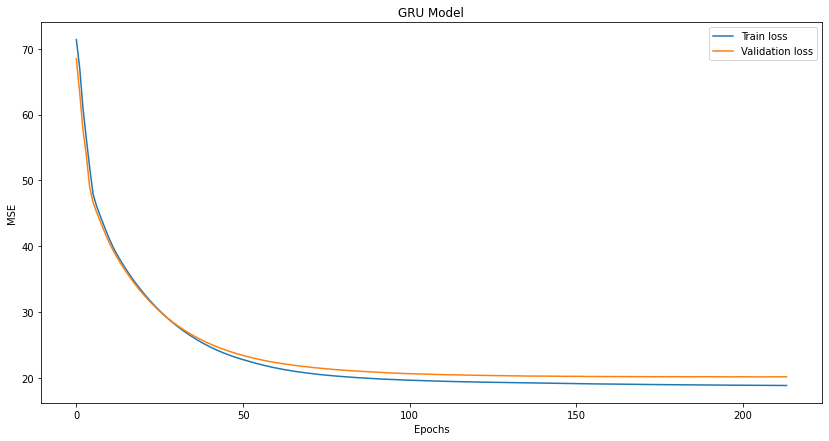

Epoch 1/1000
434/434 - 4s - loss: 59.0713 - accuracy: 0.6313 - val_loss: 55.1263 - val_accuracy: 0.5742 - 4s/epoch - 10ms/step
Epoch 2/1000
434/434 - 2s - loss: 52.8393 - accuracy: 0.2127 - val_loss: 49.7246 - val_accuracy: 0.0606 - 2s/epoch - 5ms/step
Epoch 3/1000
434/434 - 2s - loss: 47.8734 - accuracy: 0.1686 - val_loss: 45.5517 - val_accuracy: 0.5382 - 2s/epoch - 6ms/step
Epoch 4/1000
434/434 - 2s - loss: 44.0041 - accuracy: 0.5710 - val_loss: 42.3943 - val_accuracy: 0.5674 - 2s/epoch - 5ms/step
Epoch 5/1000
434/434 - 2s - loss: 41.0732 - accuracy: 0.5876 - val_loss: 39.9110 - val_accuracy: 0.5817 - 2s/epoch - 6ms/step
Epoch 6/1000
434/434 - 2s - loss: 38.6851 - accuracy: 0.5936 - val_loss: 37.7506 - val_accuracy: 0.5927 - 2s/epoch - 5ms/step
Epoch 7/1000
434/434 - 2s - loss: 36.5600 - accuracy: 0.5986 - val_loss: 35.8091 - val_accuracy: 0.5943 - 2s/epoch - 5ms/step
Epoch 8/1000
434/434 - 2s - loss: 34.6703 - accuracy: 0.5975 - val_loss: 34.0790 - val_accuracy: 0.5927 - 2s/epoch - 

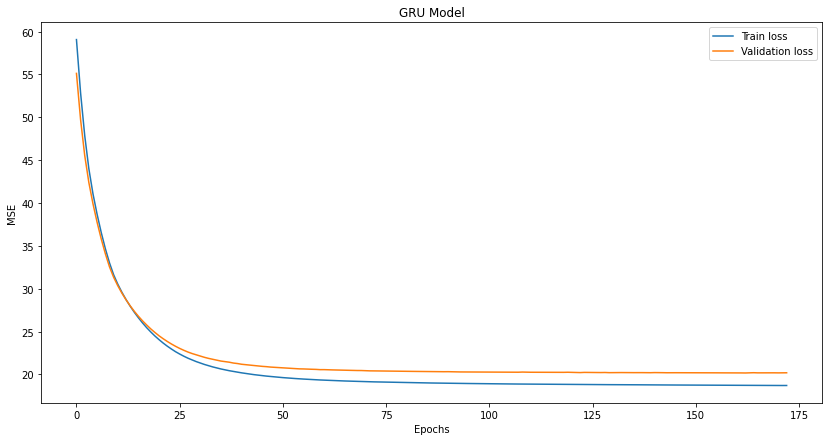

Epoch 1/1000
434/434 - 5s - loss: 53.9754 - accuracy: 0.5941 - val_loss: 47.4824 - val_accuracy: 0.5052 - 5s/epoch - 11ms/step
Epoch 2/1000
434/434 - 3s - loss: 43.7264 - accuracy: 0.5367 - val_loss: 40.7079 - val_accuracy: 0.5587 - 3s/epoch - 6ms/step
Epoch 3/1000
434/434 - 3s - loss: 38.4916 - accuracy: 0.5848 - val_loss: 36.7876 - val_accuracy: 0.5862 - 3s/epoch - 6ms/step
Epoch 4/1000
434/434 - 3s - loss: 34.9766 - accuracy: 0.5989 - val_loss: 33.8542 - val_accuracy: 0.5988 - 3s/epoch - 6ms/step
Epoch 5/1000
434/434 - 3s - loss: 31.9828 - accuracy: 0.6038 - val_loss: 31.2871 - val_accuracy: 0.5956 - 3s/epoch - 6ms/step
Epoch 6/1000
434/434 - 3s - loss: 29.8473 - accuracy: 0.6055 - val_loss: 29.5373 - val_accuracy: 0.5972 - 3s/epoch - 6ms/step
Epoch 7/1000
434/434 - 3s - loss: 28.1808 - accuracy: 0.6059 - val_loss: 28.0335 - val_accuracy: 0.6005 - 3s/epoch - 6ms/step
Epoch 8/1000
434/434 - 3s - loss: 26.7559 - accuracy: 0.6054 - val_loss: 26.7715 - val_accuracy: 0.5985 - 3s/epoch - 

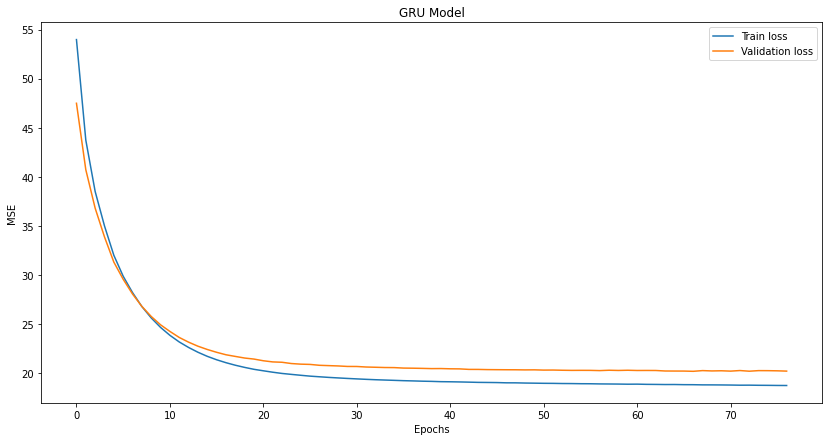

Epoch 1/1000
434/434 - 5s - loss: 49.0037 - accuracy: 0.5786 - val_loss: 38.1384 - val_accuracy: 0.5418 - 5s/epoch - 12ms/step
Epoch 2/1000
434/434 - 3s - loss: 33.4070 - accuracy: 0.5903 - val_loss: 30.6254 - val_accuracy: 0.5904 - 3s/epoch - 7ms/step
Epoch 3/1000
434/434 - 3s - loss: 28.3102 - accuracy: 0.6037 - val_loss: 27.6313 - val_accuracy: 0.5969 - 3s/epoch - 7ms/step
Epoch 4/1000
434/434 - 3s - loss: 25.8261 - accuracy: 0.6030 - val_loss: 25.7148 - val_accuracy: 0.6001 - 3s/epoch - 7ms/step
Epoch 5/1000
434/434 - 3s - loss: 24.1104 - accuracy: 0.6025 - val_loss: 24.2571 - val_accuracy: 0.5901 - 3s/epoch - 7ms/step
Epoch 6/1000
434/434 - 3s - loss: 22.8305 - accuracy: 0.5994 - val_loss: 23.1957 - val_accuracy: 0.5904 - 3s/epoch - 7ms/step
Epoch 7/1000
434/434 - 3s - loss: 21.9150 - accuracy: 0.5980 - val_loss: 22.4723 - val_accuracy: 0.5784 - 3s/epoch - 7ms/step
Epoch 8/1000
434/434 - 3s - loss: 21.2668 - accuracy: 0.5957 - val_loss: 21.9687 - val_accuracy: 0.5953 - 3s/epoch - 

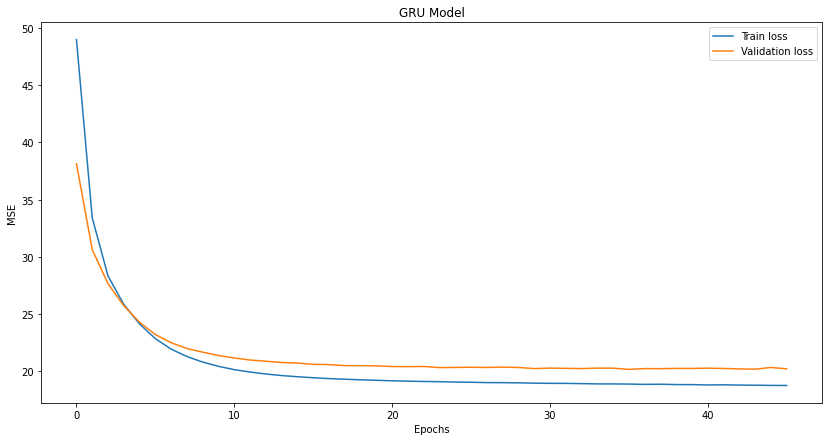

In [ ]:
auto_model(64, 8) # initial first month 47
auto_model(64, 16)
auto_model(64, 32)
auto_model(64, 64)

# bs64_fm46

In [ ]:
first_month = 46
last_month = 59
serie_size = 12
data_series = []

for index, row in summed_data.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        # serie = [row['barcode'], row['kodejenis']]
        serie = [row['barcode']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)


columns = ['barcode']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()
data_series = data_series.drop(['barcode'], axis=1)
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)
print("Train set", train.shape)
print("Validation set", valid.shape)
az = train.sort_index(axis = 0)
az.head()
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

NameError: ignored

In [ ]:
def auto_model(batch, neuron, month):
  serie_size =  X_train.shape[1] # 12
  n_features =  X_train.shape[2] # 1
  epochs = 1000
  lr = 0.0001

  gru_model = Sequential()
  gru_model.add(L.GRU(neuron, input_shape=(serie_size, n_features)))
  gru_model.add(L.Dense(1, activation='linear'))
  adam = optimizers.Adam(lr)
  gru_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

  early_stop = callbacks.EarlyStopping(patience = 10)
  gru_history = gru_model.fit(X_train, Y_train, 
                                validation_data=(X_valid, Y_valid), 
                                batch_size=batch, 
                                epochs=epochs, 
                                verbose=2,
                                callbacks=[early_stop])
  gru_model.save(f"gru_model-bs{batch}_hn{neuron}_month{month}.h5")

  lstm_train_pred = gru_model.predict(X_train)
  lstm_val_pred = gru_model.predict(X_valid)
  print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
  print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))
  
  fig, ax1 = plt.subplots(1, sharey=True,figsize=(14,7))
  ax1.plot(gru_history.history['loss'], label='Train loss')
  ax1.plot(gru_history.history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('GRU Model')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('MSE')
  plt.show()

Epoch 1/1000
868/868 - 7s - loss: 60.2478 - accuracy: 0.6624 - val_loss: 60.8603 - val_accuracy: 0.6004 - 7s/epoch - 8ms/step
Epoch 2/1000
868/868 - 4s - loss: 54.9178 - accuracy: 0.1726 - val_loss: 55.9096 - val_accuracy: 0.0681 - 4s/epoch - 5ms/step
Epoch 3/1000
868/868 - 4s - loss: 50.3111 - accuracy: 0.1590 - val_loss: 51.1868 - val_accuracy: 0.5252 - 4s/epoch - 5ms/step
Epoch 4/1000
868/868 - 4s - loss: 46.2560 - accuracy: 0.5640 - val_loss: 47.0557 - val_accuracy: 0.5527 - 4s/epoch - 5ms/step
Epoch 5/1000
868/868 - 4s - loss: 42.6420 - accuracy: 0.5843 - val_loss: 43.7877 - val_accuracy: 0.5714 - 4s/epoch - 5ms/step
Epoch 6/1000
868/868 - 4s - loss: 40.0534 - accuracy: 0.5949 - val_loss: 41.4166 - val_accuracy: 0.5753 - 4s/epoch - 5ms/step
Epoch 7/1000
868/868 - 4s - loss: 37.9886 - accuracy: 0.6001 - val_loss: 39.4410 - val_accuracy: 0.5811 - 4s/epoch - 5ms/step
Epoch 8/1000
868/868 - 4s - loss: 36.2520 - accuracy: 0.6029 - val_loss: 37.7368 - val_accuracy: 0.5822 - 4s/epoch - 5

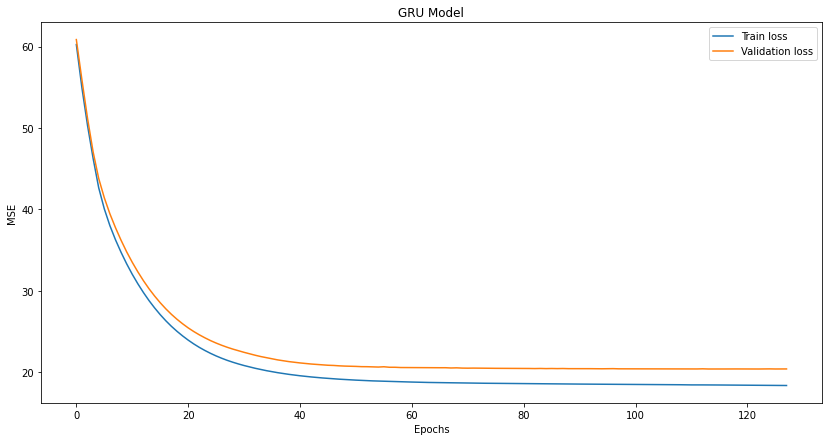

Epoch 1/1000
868/868 - 7s - loss: 58.9013 - accuracy: 0.5365 - val_loss: 53.4851 - val_accuracy: 0.0681 - 7s/epoch - 8ms/step
Epoch 2/1000
868/868 - 5s - loss: 44.7912 - accuracy: 0.3365 - val_loss: 43.4527 - val_accuracy: 0.5636 - 5s/epoch - 5ms/step
Epoch 3/1000
868/868 - 4s - loss: 38.4197 - accuracy: 0.5971 - val_loss: 38.5046 - val_accuracy: 0.5816 - 4s/epoch - 5ms/step
Epoch 4/1000
868/868 - 5s - loss: 34.6566 - accuracy: 0.6075 - val_loss: 35.3706 - val_accuracy: 0.5824 - 5s/epoch - 5ms/step
Epoch 5/1000
868/868 - 5s - loss: 32.0319 - accuracy: 0.6081 - val_loss: 32.9104 - val_accuracy: 0.5830 - 5s/epoch - 5ms/step
Epoch 6/1000
868/868 - 5s - loss: 29.8848 - accuracy: 0.6059 - val_loss: 30.8611 - val_accuracy: 0.5813 - 5s/epoch - 5ms/step
Epoch 7/1000
868/868 - 5s - loss: 28.0971 - accuracy: 0.6043 - val_loss: 29.1492 - val_accuracy: 0.5806 - 5s/epoch - 5ms/step
Epoch 8/1000
868/868 - 4s - loss: 26.5969 - accuracy: 0.6038 - val_loss: 27.7153 - val_accuracy: 0.5798 - 4s/epoch - 5

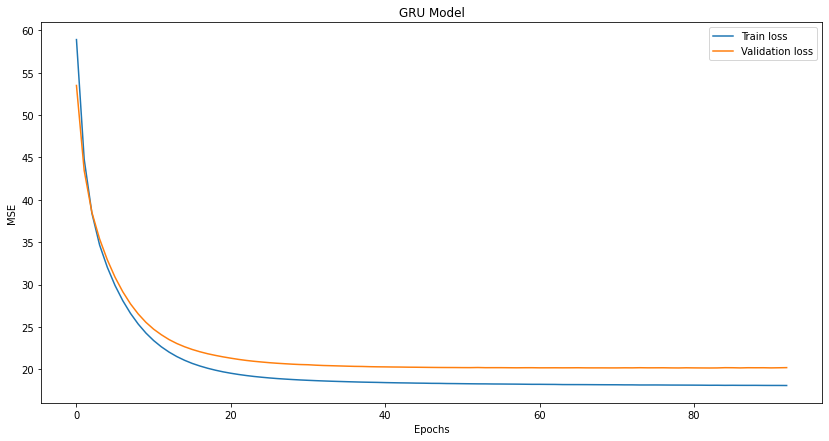

Epoch 1/1000
868/868 - 7s - loss: 46.0381 - accuracy: 0.4592 - val_loss: 39.5509 - val_accuracy: 0.5455 - 7s/epoch - 8ms/step
Epoch 2/1000
868/868 - 5s - loss: 33.8975 - accuracy: 0.5969 - val_loss: 33.1623 - val_accuracy: 0.5910 - 5s/epoch - 6ms/step
Epoch 3/1000
868/868 - 5s - loss: 29.3011 - accuracy: 0.6135 - val_loss: 29.4525 - val_accuracy: 0.5852 - 5s/epoch - 6ms/step
Epoch 4/1000
868/868 - 5s - loss: 26.3878 - accuracy: 0.6144 - val_loss: 26.9582 - val_accuracy: 0.5884 - 5s/epoch - 6ms/step
Epoch 5/1000
868/868 - 5s - loss: 24.3071 - accuracy: 0.6156 - val_loss: 25.1297 - val_accuracy: 0.5910 - 5s/epoch - 6ms/step
Epoch 6/1000
868/868 - 5s - loss: 22.7403 - accuracy: 0.6151 - val_loss: 23.7814 - val_accuracy: 0.5887 - 5s/epoch - 6ms/step
Epoch 7/1000
868/868 - 5s - loss: 21.6021 - accuracy: 0.6116 - val_loss: 22.8706 - val_accuracy: 0.5921 - 5s/epoch - 6ms/step
Epoch 8/1000
868/868 - 5s - loss: 20.7776 - accuracy: 0.6086 - val_loss: 22.1696 - val_accuracy: 0.5856 - 5s/epoch - 6

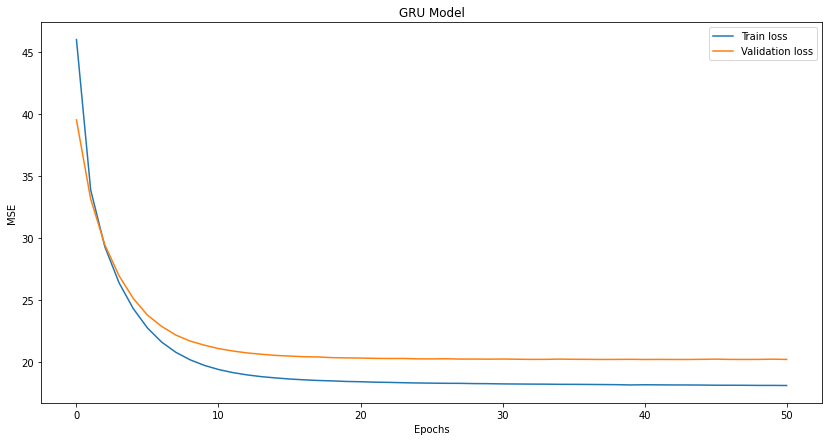

Epoch 1/1000
868/868 - 8s - loss: 37.8370 - accuracy: 0.5922 - val_loss: 29.5230 - val_accuracy: 0.5929 - 8s/epoch - 9ms/step
Epoch 2/1000
868/868 - 6s - loss: 25.1996 - accuracy: 0.6133 - val_loss: 24.8170 - val_accuracy: 0.5889 - 6s/epoch - 7ms/step
Epoch 3/1000
868/868 - 6s - loss: 22.1056 - accuracy: 0.6114 - val_loss: 22.6692 - val_accuracy: 0.5837 - 6s/epoch - 7ms/step
Epoch 4/1000
868/868 - 6s - loss: 20.4802 - accuracy: 0.6071 - val_loss: 21.6305 - val_accuracy: 0.5900 - 6s/epoch - 7ms/step
Epoch 5/1000
868/868 - 6s - loss: 19.6332 - accuracy: 0.6077 - val_loss: 21.0353 - val_accuracy: 0.5845 - 6s/epoch - 7ms/step
Epoch 6/1000
868/868 - 6s - loss: 19.1428 - accuracy: 0.6079 - val_loss: 20.6917 - val_accuracy: 0.5887 - 6s/epoch - 7ms/step
Epoch 7/1000
868/868 - 6s - loss: 18.8706 - accuracy: 0.6089 - val_loss: 20.5152 - val_accuracy: 0.5900 - 6s/epoch - 7ms/step
Epoch 8/1000
868/868 - 6s - loss: 18.6944 - accuracy: 0.6098 - val_loss: 20.4314 - val_accuracy: 0.5771 - 6s/epoch - 7

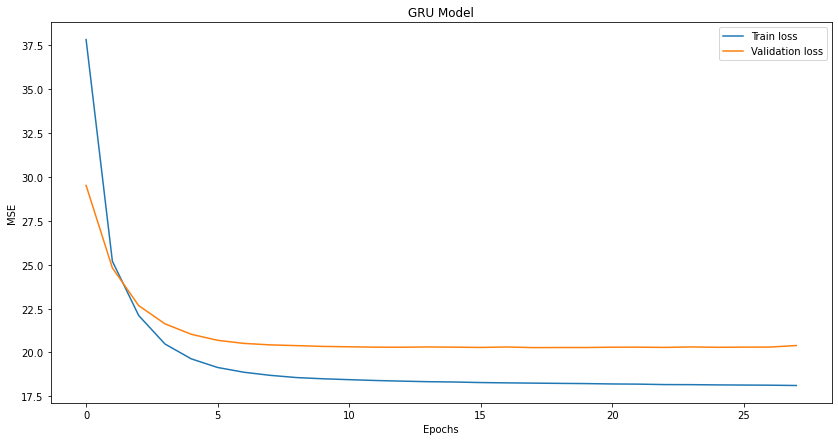

In [ ]:
auto_model(64, 8) # initial first month 46
auto_model(64, 16)
auto_model(64, 32)
auto_model(64, 64)

In [ ]:
# save model to single file
# gru_model.save('gru_model.h5')

# Grafik loss

In [ ]:
mse_data = {
    'label': ['hn8_bs8', 'hn8_bs16', 'hn8_bs32', 'hn8_bs64', 'hn16_bs8', 'hn16_bs16', 'hn16_bs32', 'hn16_bs64', 'hn32_bs8', 'hn32_bs16', 'hn32_bs32', 'hn32_bs64', 'hn64_bs8', 'hn64_bs16', 'hn64_bs32', 'hn64_bs64'],
    'train_loss': [18.2807, 18.0760, 18.1033, 18.0075, 18.0656, 18.0799, 17.9932, 17.9708, 18.1356, 17.9326, 17.9475, 18.1038, 18.3331, 18.0864, 18.0973, 18.1149],
    'val_loss': [20.2143, 20.1159, 20.2461, 20.3417, 20.2482, 20.1407, 20.2909, 20.3262, 20.1198, 20.1386, 20.3004, 20.4894, 20.3695, 20.1952, 20.2034, 20.3936]}
df_mse = pd.DataFrame(mse_data)

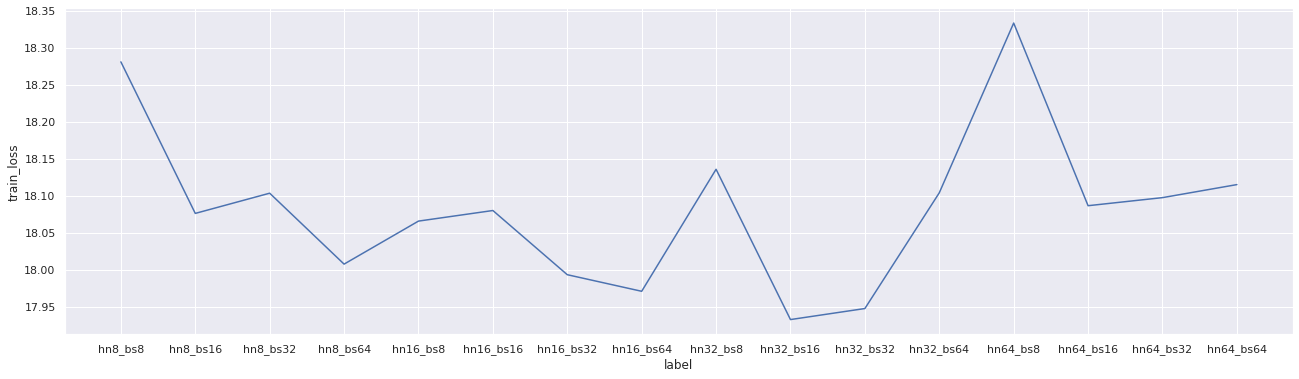

In [ ]:
sns.set(rc={'figure.figsize':(22,6)})
sns.lineplot(x="label", y="train_loss", data=df_mse)

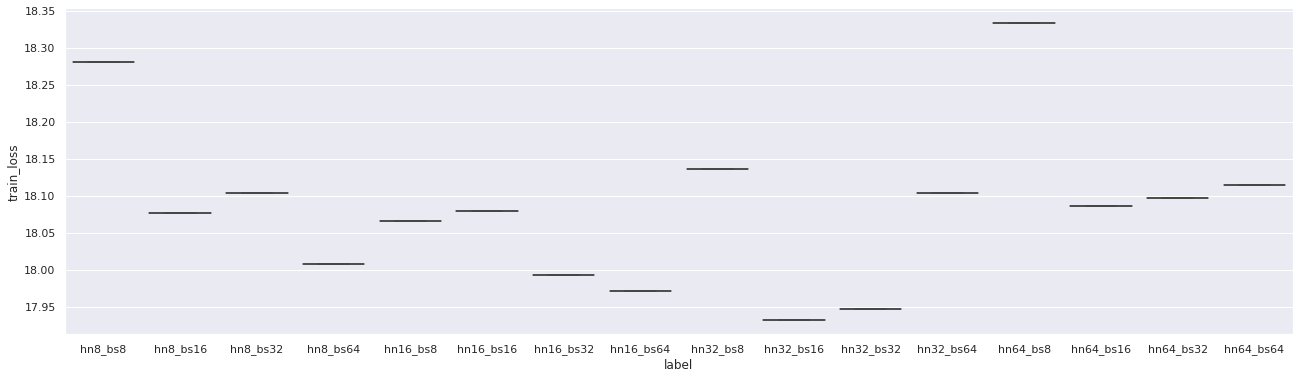

In [ ]:
sns.set(rc={'figure.figsize':(22,6)})
sns.boxplot(x='label', y='train_loss', data=df_mse)